En este notebook hay que hacer: 

- Codificar las variables categóricas como tipo object (las teníamos tipo float)
- Tener claro qué variables son ordinales y cuáles son nominales
- Desglosar las variables nominales
- Evaluar missings por filas, eliminar los pacientes con >35% y ver cómo quedan los missings por variables
- Mirar las distribuciones de las variables categóricas
- Mirar los outliers de las variables numéricas (tanto qué variables son como los porcentajes de outliers que tienen)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno

In [59]:
df = pd.read_csv('datos_preprocesados.csv')

## CAMBIAR TIPO DE VARIABLES

In [60]:
columnas_a_fecha = [
    'fecha_diag_pe', 'fecha_firma_ci_cardiomom', 'fecha_firma_ci_muestbio', 
    'fecha_nac', 'fur_pre', 'fur_post', 'fecha_eco_1tri', 'fecha_plgf_1tri', 
    'fecha_eco_2tri', 'fecha_ult_deter', 'fecha_parto', 'fecha_exploracion', 
    'fecha_extraccion', 'survey_timestamp_estres','survey_timestamp_scl90r','survey_timestamp_memoria'
]

# Aplicamos la conversión 
# Usamos errors='coerce' por si acaso hay algún dato mal escrito (lo pondrá como NaT)
for col in columnas_a_fecha:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Nuevos tipos de datos:")
print(df[columnas_a_fecha].dtypes)

Nuevos tipos de datos:
fecha_diag_pe               datetime64[ns]
fecha_firma_ci_cardiomom    datetime64[ns]
fecha_firma_ci_muestbio     datetime64[ns]
fecha_nac                   datetime64[ns]
fur_pre                     datetime64[ns]
fur_post                    datetime64[ns]
fecha_eco_1tri              datetime64[ns]
fecha_plgf_1tri             datetime64[ns]
fecha_eco_2tri              datetime64[ns]
fecha_ult_deter             datetime64[ns]
fecha_parto                 datetime64[ns]
fecha_exploracion           datetime64[ns]
fecha_extraccion            datetime64[ns]
survey_timestamp_estres     datetime64[ns]
survey_timestamp_scl90r     datetime64[ns]
survey_timestamp_memoria    datetime64[ns]
dtype: object


In [68]:
categoricas = [
    'estudio_inicial',
    'etnia',
    'concepcion',
    'motivo_induccion',
    'tipo_parto',
    'tipo_cesarea',
    'motivo_cesarea',
    'valvula_aortica',
    'localizacion',
    'tipo_cardiopatia_estructural',
    'ant_fam_enfcardiovasc',
    'que_enf',
    'sexo_rn',
    'ecocardio',
    'fuma_post',
    'unidades_plgf_1tri',
    'tipo_pe',
    'tipo_pe_post',
    'tratamiento_diabetes',
    'cigarrillo_masdificil_renunciar',
    'patron_menstrual',
    'parto_previo_mayor37_pre',
    'parto_previo_menor37_pre',
    'aborto_menor20',
    'ant_cir',
    'ant_peg',
    'ant_obito',
    'ant_pe',
    'ant_hellp',
    'ant_cesarea',
    'ant_diabetes_pregest',
    'hta_pregest',
    'sindr_antifosfolipido',
    'enf_autoinm',
    'fuma',
    'alcohol',
    'drogas',
    'plgf_1tri',
    'deter_sflt1_plgf_gest',
    'ini_trabajo_parto_espontaneo',
    'induccion',
    'hemorragia_pospart_transfusion',
    'edema_agudo_pulmon',
    'histerectomia',
    'otras',
    'hipertension_gest',
    'pe',
    'sd_hellp',
    'desprendimiento_placenta',
    'obito_fetal',
    'hemocerebral_ictus',
    'embolia_tep',
    'trombosis_venosa_prof',
    'uci_materna_ucoi',
    'covid',
    'cir',
    'peg',
    'diabetes_gest',
    'insulinizada_1',
    'colestasis_intrahepatica',
    'corioamnionitis',
    'parto_mayor37_post',
    'parto_menor37_post',
    'aborto_menor20_post',
    'ant_cir_post',
    'ant_peg_post',
    'ant_obito_post',
    'ant_pe_post',
    'ant_hellp_post',
    'ant_diabetes_gest',
    'insulinizada_2',
    'ant_colestasis_gest',
    'lactancia_materna',
    'lactancia_materna_actual',
    'ant_cesarea_post',
    'hta_cronica',
    'medicacion_ta',
    'ant_infarto_ictus',
    'diabetes_mellitus_1_2',
    'sindr_antifosfolipido_post',
    'enf_autoinm_post',
    'dislipemia',
    'medicacion_hipolipemiante',
    'menopausia',
    'anticonceptivos_orales',
    'enf_renal_cronica',
    'alcohol_post',
    'drogas_post',
    'notch_pulmonar',
    'valvulopatia',
    'aortica',
    'estenosis_aortica',
    'insuficiencia_aortica',
    'mitral',
    'insuficiencia_mitral',
    'insuficiencia_tricuspidea',
    'segmentarismos',
    'cardiopatia_estructural',
    'complete',
    'muestra_pelo',
    'muestra_pelo_separada',
    'pelo_tenido',
    'trat_pelo_ult3meses',
    'analitica_realizada',
    'dificultad_nofumar_prohibido',
    'fuma_mas_despertar',
    'fuma_enferma',
    'uterinas_p95_1tri',
    'uterinas_p95_eco_2tri', 
    'estadio_enf_renal',
    'cantidad_fuma_post'
]

df[categoricas] = df[categoricas].astype(object)

df.dtypes


id                                   int64
fecha_firma_ci_cardiomom    datetime64[ns]
fecha_firma_ci_muestbio     datetime64[ns]
fecha_nac                   datetime64[ns]
peso_ini_gest                      float64
                                 ...      
localizacion                        object
motivo_induccion                    object
tomo_durante_gest                   object
tratamiento_diabetes                object
que_enf                             object
Length: 433, dtype: object

In [69]:
mapeo_semantico = {
    'etnia': {0: 'Blanca', 1: 'Latina', 2: 'Negra', 3: 'Sureste_asiatico', 4: 'Asia_Oriental', 5: 'Mixto'},
    'estudio_inicial': {0: 'Ninguno', 1: 'BiSC', 2: 'EUROPE', 3: 'Angiocor'},
    'concepcion': {0: 'Espontanea', 1: 'FIV', 2: 'FIV_ovodonacion', 3: 'Inseminacion'},
    'motivo_induccion': {0: 'CIR_PEG', 1: 'Preeclampsia', 2: 'GCP', 3: 'Patologia_materna', 4: 'RPM', 5: 'Otras'},
    'tipo_parto': {0: 'Eutocico', 1: 'Instrumentado', 2: 'Cesarea'},
    'tipo_cesarea': {0: 'Electiva', 1: 'Intercurrente'},
    'motivo_cesarea': {0: 'Estacionado_Fallida', 1: 'PBF', 2: 'Presentacion_Fetal', 3: 'CIR', 4: 'Patologia_materna', 5: 'Cirugia_Uterina_Previa', 6: 'Otras'},
    'valvula_aortica': {0: 'Tricuspide', 1: 'Bicuspide'},
    'localizacion': {0: 'Anterior', 1: 'Lateral', 2: 'Inferior', 3: 'Septal', 4: 'Otro'},
    'tipo_cardiopatia_estructural': {0: 'Derrame', 1: 'Dilatacion_VD', 2: 'Dilatacion_VI', 3: 'Disfuncion_Ventr', 4: 'IT_Ligera', 5: 'Sospecha_CIA', 6: 'VAo_Bicuspide'},
    'ant_fam_enfcardiovasc': {0: 'No', 1: 'Si'},
    'que_enf': {0: 'HTA', 1: 'Infarto_Coronaria', 2: 'Ictus_AVC'},
    'sexo_rn': {0: 'Femenino', 1: 'Masculino'},
    'ecocardio': {0: 'Pendiente', 1: 'No_Desea', 2: 'Si'},
    'fuma_post': {0: 'No', 1: 'Ex_Fumadora', 2: 'Si'},
    'tomo_durante_gest': {0: 'Aspirina', 1: 'Heparina', 2: 'Antihipertensivo', 3: 'Ninguna'},
    'tratamiento_diabetes': {0: 'Oral', 1: 'Insulina', 2: 'Ambos'},
}

# Limpieza previa de datos (asegurar enteros)
nominales_existentes = [col for col in categoricas if col in df.columns]
for col in nominales_existentes:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    except:
        pass

# One-Hot Encoding (genera columnas tipo 'etnia_0', 'etnia_1')
df_encoded = pd.get_dummies(df, columns=nominales_existentes, dummy_na=False, dtype=int)

# Renombramiento semántico
# Recorremos el diccionario para renombrar 'variable_0' -> 'variable_Significado'
nuevos_nombres = {}
for var, mapa in mapeo_semantico.items():
    if var in nominales_existentes:
        for valor, etiqueta in mapa.items():
            col_original = f"{var}_{valor}"
            # pandas a veces usa .0 si eran floats, probamos ambos
            col_float = f"{var}_{valor}.0"
            
            col_destino = f"{var}_{etiqueta}"
            
            if col_original in df_encoded.columns:
                nuevos_nombres[col_original] = col_destino
            elif col_float in df_encoded.columns:
                nuevos_nombres[col_float] = col_destino

# Aplicar cambio de nombre
df_encoded.rename(columns=nuevos_nombres, inplace=True)

# Limpiar sufijos residuales '.0' en otras columnas no mapeadas (si las hay)
df_encoded.columns = df_encoded.columns.str.replace('.0', '', regex=False)

print("Variables nominales codificadas y renombradas.")
print(f"Ejemplos de nuevas columnas: {[c for c in df_encoded.columns if c in nuevos_nombres.values()][:5]}...")
print(f"Dimensiones tras encoding: {df_encoded.shape}")

df = df_encoded

Variables nominales codificadas y renombradas.
Ejemplos de nuevas columnas: ['estudio_inicial_Ninguno', 'estudio_inicial_BiSC', 'estudio_inicial_EUROPE', 'estudio_inicial_Angiocor', 'etnia_Blanca']...
Dimensiones tras encoding: (608, 565)


Variables ordinales del dataset: 

nivel_estudios, tipo_pe_pre, riesgo_pe_1tri, apgar_1min, apgar_5min, apgar_10min, tiempo_fumar_cigarrillo_despertar, num_fuma_dia

- Relacionadas con la dieta:
 'pan', 'verdura_ensalada', 'fruta', 'yogur_leche', 'pasta_arroz', 'aceite_oliva_girasol', 'carne', 'bebida_alcoholica', 'vasos_agua_dia', 'embutidos', 'queso_nbsp', 'bolleria_pasteleria', 'mantequilla', 'bebida_azucarada', 'comida_rapida', 'pescado', 'legumbres', 'frutos_secos', 'frec_afectado_inesperadamente', 'frec_incapaz_controlar_cosas_importantes', 'frec_nervioso_estresado', 'frec_manejando_pequenos_problemas_irritantes', 'frec_afrontando_cambios_importantes', 'frec_seguro_capacidad_manejar_problemas_personales', 'frec_cosas_van_bien', 'frec_no_afrontar_todas_cosas', 'frec_controlar_dificultades', 'frec_todo_bajo_control', 'frec_enfadado_cosas_fuera_control', 'frec_pensado_cosas_por_hacer', 'frec_controlar_forma_pasar_tiempo', 'frec_dificultades_acumuladas'

- Relacionadas con SCL-90-R (las psicológicas):

dolores_musculares, poca_memoria, nervios, desmayos_mareos, poco_interes_sexo, critico_demas, idea_alguien_controla, controlar mis pensamientos, culpo_otros_problemas, problemas_memoria, preocupo_descuido, facilmente_irritable, dolores_corazon_pecho, miedo_espacios_abiertos, debil, pensar_muerte_morirme, impulso_golpear_herir, ganas_romper_cosas, timida_incomoda_demas, atrapada_encerrada, asustarse, explosion_ataques_furia, impulso_accidente, comida_mucha_poca, despertarse_madrugada, levantarse_dormir, pesadillas, sola, cohibida, miedos, sentimientos_heridos,gente_nofavorable, inferior_demas, nauseas_malestar, tension, dolores_brazos_piernas, piensan_mal_mi, ganas_morir, voces_noentienden_otros, falta_confianza, dificil_mente_blanco, entumecida_hormigueo, garganta, sin_futuro, concentrarme, debilidad, pesado_movimientos, pensar_acabar_vida,comer_mas_cuenta, despertarme_pronto, sueno_inquieto, noquieren, sentirme_atrapada, espantarse, estallidos_ira, sentir_ansiosa, discusiones, nerviosa_sola, no_valorada, sola_congente, inquieta, inutil, malo_pasar, gritar_tirarcosas, miedo_desmayarme_gente, aprovechan_mi, pensar_sexo_molesta, sercastigada_pecados, pensamientos_miedo, cuerpo_mal, alejada_personas, culpable, cabeza_nobien

- Relacionadas con MFE-30 (las de memoria):

fallos_memoria_problemas, olvido_puesto_cosas, olvido_lugares, dificultad_seguir_tele, sigo_antiguas_rutinas, comprobar_hecho, olvido_cuando_cosas, olvido_llevar_objetos, olvido_dijeron, leo_leido_antes, divago_conver, no_reconozco_amigos, dificultad_aprender_habilidades, palabra_punta_lengua, olvido_cosas_planeado, olvido_detalles_ayer, olvido_tema_conversacion, pierdo_hilo_leo, olvido_recados, olvido_detalles_mi, confundo_detalles_otras_personas, olvido_anecdotas, olvido_detalles_habituales, olvido_famosos, olvido_donde_guardo, direccion_erronea, hago_dos_veces, repito_hablando, olvido_usar_objeto, olvido_nombre_personas

In [75]:
# Ahora convertimos las variables ordinales a object

# Lista completa de variables ordinales
ordinales = [
    # Variables ordinales generales
    'nivel_estudios',
    'tipo_pe_pre', 
    'riesgo_pe_1tri',
    'apgar_1min',
    'apgar_5min',
    'apgar_10min',
    'tiempo_fumar_cigarrillo_despertar',
    'num_fuma_dia',
    
    # Variables SCL-90-R
    'dolores_cabeza', 'nerviosismo', 'pensamientos_desagradables', 'sensacion_mareo_desmayo', 
    'falta_interes_relsex', 'criticar', 'otro_controla_pensamientos', 'otros_culpables', 
    'dificultad_memorizar', 'preocupada_falta_ganas', 'enojada_malhumorada', 'dolores_pecho', 
    'miedo_espabiertos_calles', 'poca_energia', 'pensar_quitar_vida', 'escuchar_voces', 
    'temblores_cuerpo', 'perder_confianza_mayoria_personas', 'no_ganas_comer', 'llorar_cualquier_cosa', 
    'incomoda_personas_otrosexo', 'atrapada_encerrada', 'asustarme', 'no_controlarme', 
    'miedo_salir_sola', 'sentirme_culpable', 'dolores_espalda', 'no_terminar_cosas', 
    'sentirme_sola', 'sentirme_triste', 'preocuparme_demasiado', 'no_tener_interes', 
    'tener_miedos', 'herida_sentimientos', 'creer_gente_sabe_pensando', 'sentir_no_comprenden', 
    'sentir_no_caigo_bien', 'hacer_despacio', 'corazon_late_fuerte', 'nauseas_dolorestomago', 
    'sentirme_inferior', 'calambres_manos_piernas', 'sentir_vigilan_hablan', 'problemas_dormirme', 
    'controlar_veces_hago', 'dificultad_tomar_decisiones', 'miedo_tren_bus_metro', 'dificultad_respirar', 
    'ataques_frio_calor', 'evitar_lugares_actividades_miedo', 'mente_blanco', 'hormigueos_cuerpo', 
    'nudo_garganta', 'esperanzas_futuro', 'dificultad_concentrarme', 'debilidad_cuerpo', 
    'nerviosa_agitada', 'pesados_brazos_piernas', 'pensar_morir', 'comer_demasiado', 
    'incomoda_miran_hablan', 'pensamientos_no_mios', 'necesitar_golpear_alguien', 
    'madrugar_sin_necesidad', 'repetir_mucho_algo', 'dormir_inquieta', 'necesitar_romper', 
    'pensamientos_noentienden', 'pendiente_piensen', 'incomoda_mucha_gente', 'mucho_esfuerzo', 
    'ataques_miedo_panico', 'sentirme_mal_comiendo_publico', 'discusiones', 'nerviosa_sola', 
    'no_valorada', 'sola_congente', 'inquieta', 'inutil', 'malo_pasar', 'gritar_tirarcosas', 
    'miedo_desmayarme_gente', 'aprovechan_mi', 'pensar_sexo_molesta', 'sercastigada_pecados', 
    'pensamientos_miedo', 'cuerpo_mal', 'alejada_personas', 'culpable', 'cabeza_nobien',
    
    # Variables MFE-30
    'fallos_memoria_problemas', 'olvido_puesto_cosas', 'olvido_lugares', 'dificultad_seguir_tele', 
    'sigo_antiguas_rutinas', 'comprobar_hecho', 'olvido_cuando_cosas', 'olvido_llevar_objetos', 
    'olvido_dijeron', 'leo_leido_antes', 'divago_conver', 'no_reconozco_amigos', 
    'dificultad_aprender_habilidades', 'palabra_punta_lengua', 'olvido_cosas_planeado', 
    'olvido_detalles_ayer', 'olvido_tema_conversacion', 'pierdo_hilo_leo', 'olvido_recados', 
    'olvido_detalles_mi', 'confundo_detalles_otras_personas', 'olvido_anecdotas', 
    'olvido_detalles_habituales', 'olvido_famosos', 'olvido_donde_guardo', 'direccion_erronea', 
    'hago_dos_veces', 'repito_hablando', 'olvido_usar_objeto', 'olvido_nombre_personas',

    # Variables de dieta
    'pan', 'verdura_ensalada', 'fruta', 'yogur_leche', 'pasta_arroz', 'aceite_oliva_girasol', 'carne', 
    'bebida_alcoholica', 'vasos_agua_dia', 'embutidos', 'queso_nbsp', 'bolleria_pasteleria', 'mantequilla', 
    'bebida_azucarada', 'comida_rapida', 'pescado', 'legumbres', 'frutos_secos', 
    
    # Variables de estrés
    'frec_afectado_inesperadamente', 
    'frec_incapaz_controlar_cosas_importantes', 'frec_nervioso_estresado', 'frec_manejado_pequenos_problemas_irritantes', 
    'frec_afrontado_cambios_importantes', 'frec_seguro_capacidad_manejar_problemas_personales', 'frec_cosas_van_bien', 
    'frec_no_afrontar_todas_cosas', 'frec_controlar_dificultades', 'frec_todo_bajo_control', 'frec_enfadado_cosas_fuera_control', 
    'frec_pensado_cosas_por_hacer', 'frec_controlar_forma_pasar_tiempo', 'frec_dificultades_acumuladas'
]

# Verificar qué variables ordinales existen en el dataframe
ordinales_existentes = [col for col in ordinales if col in df.columns]
ordinales_faltantes = [col for col in ordinales if col not in df.columns]

print(f"Variables ordinales encontradas en el DataFrame: {len(ordinales_existentes)}")
print(f"Variables ordinales NO encontradas: {len(ordinales_faltantes)}")

if ordinales_faltantes:
    print("\nVariables ordinales que NO están en el DataFrame:")
    for var in ordinales_faltantes[:10]:
        print(f"  - {var}")
    if len(ordinales_faltantes) > 10:
        print(f"  ... y {len(ordinales_faltantes) - 10} más")

# Convertir variables ordinales a tipo object
print("\nConvirtiendo variables ordinales a tipo 'object'")
if ordinales_existentes:
    df[ordinales_existentes] = df[ordinales_existentes].astype(object)

# Verificación
if ordinales_existentes:
    print("\nVerificación de tipos de datos (primeras 10 variables ordinales):")
    print(df[ordinales_existentes[:10]].dtypes)

Variables ordinales encontradas en el DataFrame: 160
Variables ordinales NO encontradas: 0

Convirtiendo variables ordinales a tipo 'object'

Verificación de tipos de datos (primeras 10 variables ordinales):
nivel_estudios                       object
tipo_pe_pre                          object
riesgo_pe_1tri                       object
apgar_1min                           object
apgar_5min                           object
apgar_10min                          object
tiempo_fumar_cigarrillo_despertar    object
num_fuma_dia                         object
dolores_cabeza                       object
nerviosismo                          object
dtype: object


# ANÁLISIS DE MISSINGS

In [72]:
# Calculamos el porcentaje de valores faltantes por fila
missing_rows_pct = df.isnull().mean(axis=1) * 100 # Se usa .mean porque .isnull devuelve True/False, y al hacer la media se obtiene el número total de True (missings) por fila

# Identificamos las filas con más del 35% de valores faltantes
filas_a_eliminar = missing_rows_pct[missing_rows_pct > 35]
filas_a_pensar = missing_rows_pct[(missing_rows_pct > 20) & (missing_rows_pct < 35)]
print(f"Número de filas con >35% de missings (se eliminan): {len(filas_a_eliminar)}")
print(f"Filas con 20-35% de missings: \n{filas_a_pensar}")

# Eliminamos las filas con más del 35% de valores faltantes
df_cleaned = df[missing_rows_pct <= 35].copy()

Número de filas con >35% de missings (se eliminan): 26
Filas con 20-35% de missings: 
2      29.380531
5      29.734513
6      29.026549
8      29.380531
11     34.690265
         ...    
542    23.185841
548    26.725664
549    26.371681
570    30.442478
590    25.663717
Length: 130, dtype: float64


In [73]:
df_cleaned.shape

(582, 565)

In [74]:
# Vemos cómo queda el análisis de missings por columnas ahora

# Estas son las columnas con >35% y 20-35% de missings después de eliminar filas
missing_col_pct = df_cleaned.isnull().mean() * 100
cols_mas_35 = missing_col_pct[missing_col_pct > 35]
cols_20_35 = missing_col_pct[(missing_col_pct >= 20) & (missing_col_pct <= 35)]

print(f"Columnas con >35% de missings: {len(cols_mas_35)}")
print(f"Columnas con 20-35% de missings: {len(cols_20_35)}")

Columnas con >35% de missings: 44
Columnas con 20-35% de missings: 132


In [76]:
print(f"Columnas con >35% de missings: \n{cols_mas_35}")

Columnas con >35% de missings: 
num_partos_mayor37_pre                    61.512027
num_partos_menor37_pre                    95.017182
num_abortos_menor20_pre                   78.006873
tipo_pe_pre                               93.642612
fecha_plgf_1tri                           81.615120
eg_plgf_1tri                              81.615120
valor_plgf_1tri                           81.615120
fecha_eco_2tri                            87.285223
eg_eco_2tri                               87.285223
especificar_otras_induccion               91.752577
especificar_otras_cesarea                 98.109966
ph_venoso_cordon                          51.030928
ph_arterial_cordon                        57.044674
especificar                              100.000000
fecha_diag_pe                             76.460481
eg_diag_pe_pre                            76.460481
fecha_obito                              100.000000
eg_obito                                 100.000000
dias_ingreso_uci                

In [77]:
print(f"Columnas con 20-35% de missings: \n{cols_20_35}")

Columnas con 20-35% de missings: 
fecha_ult_deter        23.539519
eg_deter_sflt1_plgf    23.539519
valor_sflt1            22.508591
valor_plgf             22.508591
ratio_sflt1_plgf       22.508591
                         ...    
pensamientos_miedo     20.618557
cuerpo_mal             20.618557
alejada_personas       20.618557
culpable               20.618557
cabeza_nobien          20.618557
Length: 132, dtype: float64


In [78]:
df_cleaned2 = df_cleaned.drop(columns=cols_mas_35.index)
df_cleaned2.shape

(582, 521)

- df = datos preprocesados de reunion 1 (shape (608, 565)), (hay 382 numéricas, 167 categóricas y 16 datetime). 
- df_cleaned = datos preprocesados eliminando las variables con mas de 35% de missings (shape (582, 565)), (hay 382 numéricas, 167 categóricas y 16 datetime)
- df_cleaned2 = datos preprocesados eliminando las variables y las columnas con mas de 35% de missings (shape (582, 521)), (hay 349 numéricas, 159 categóricas y 13 datetime)

### Matriz de missings (de df_cleaned)

#### Variables numéricas

In [92]:
# Seleccionamos solo las variables numéricas para el análisis de missings
df_missing_num = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_missing_num.shape

(582, 382)

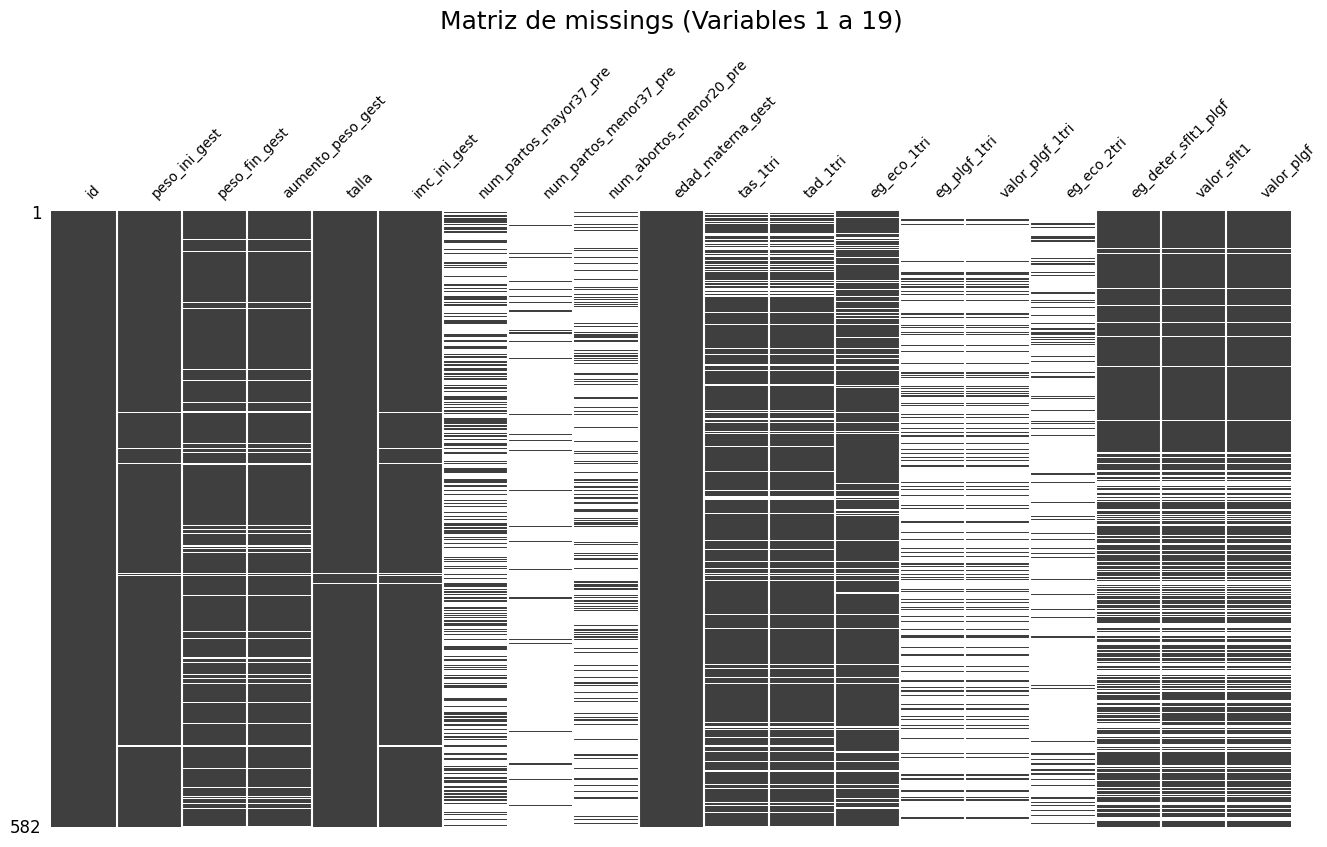

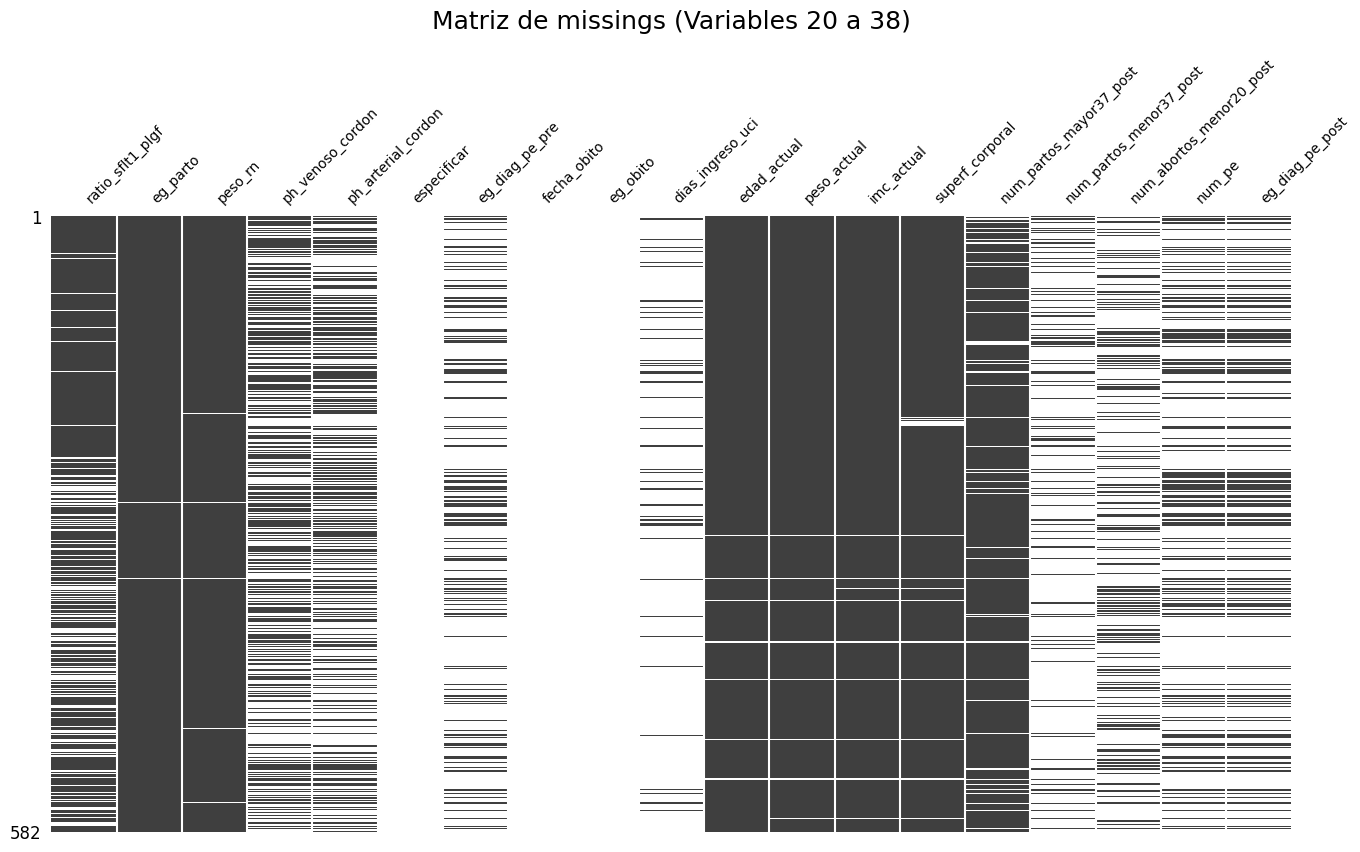

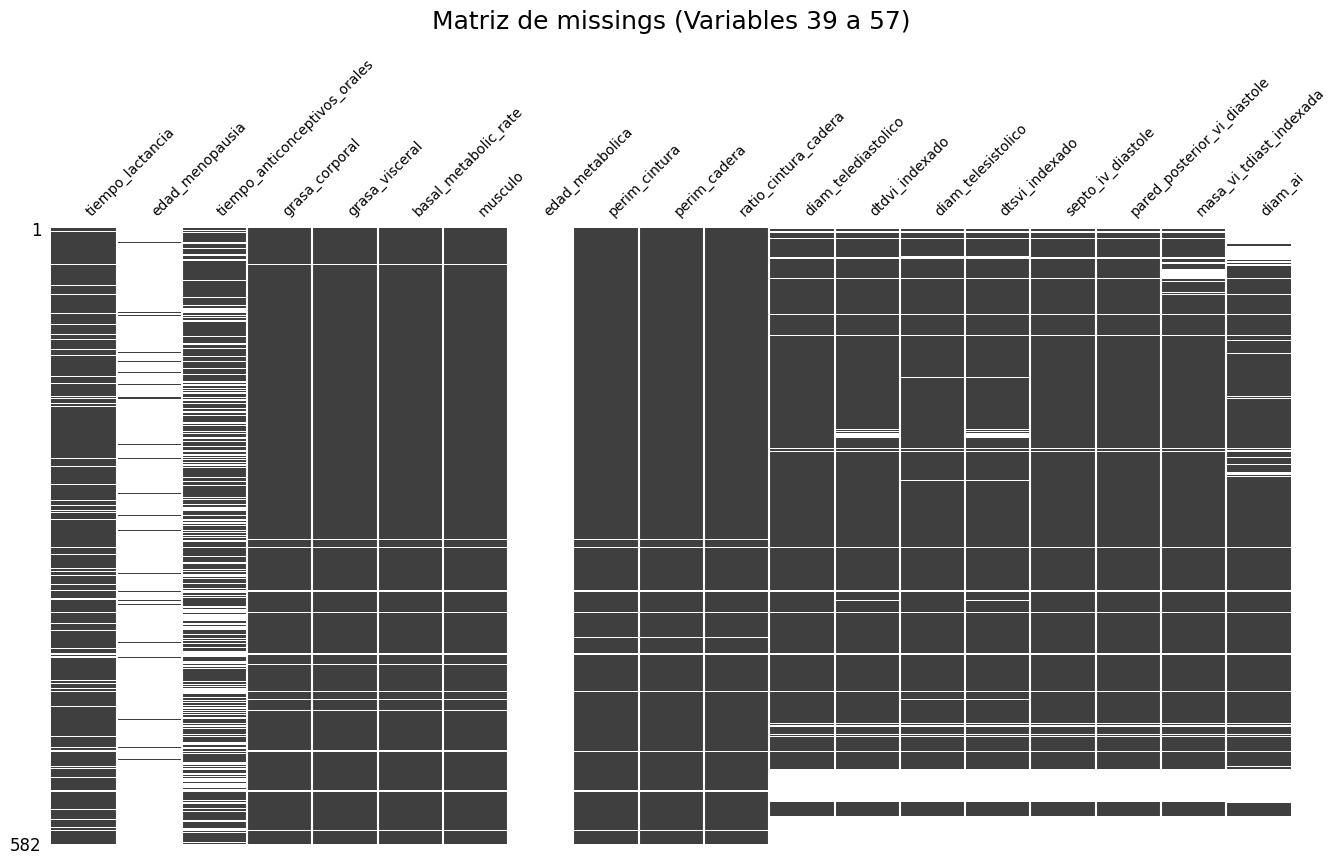

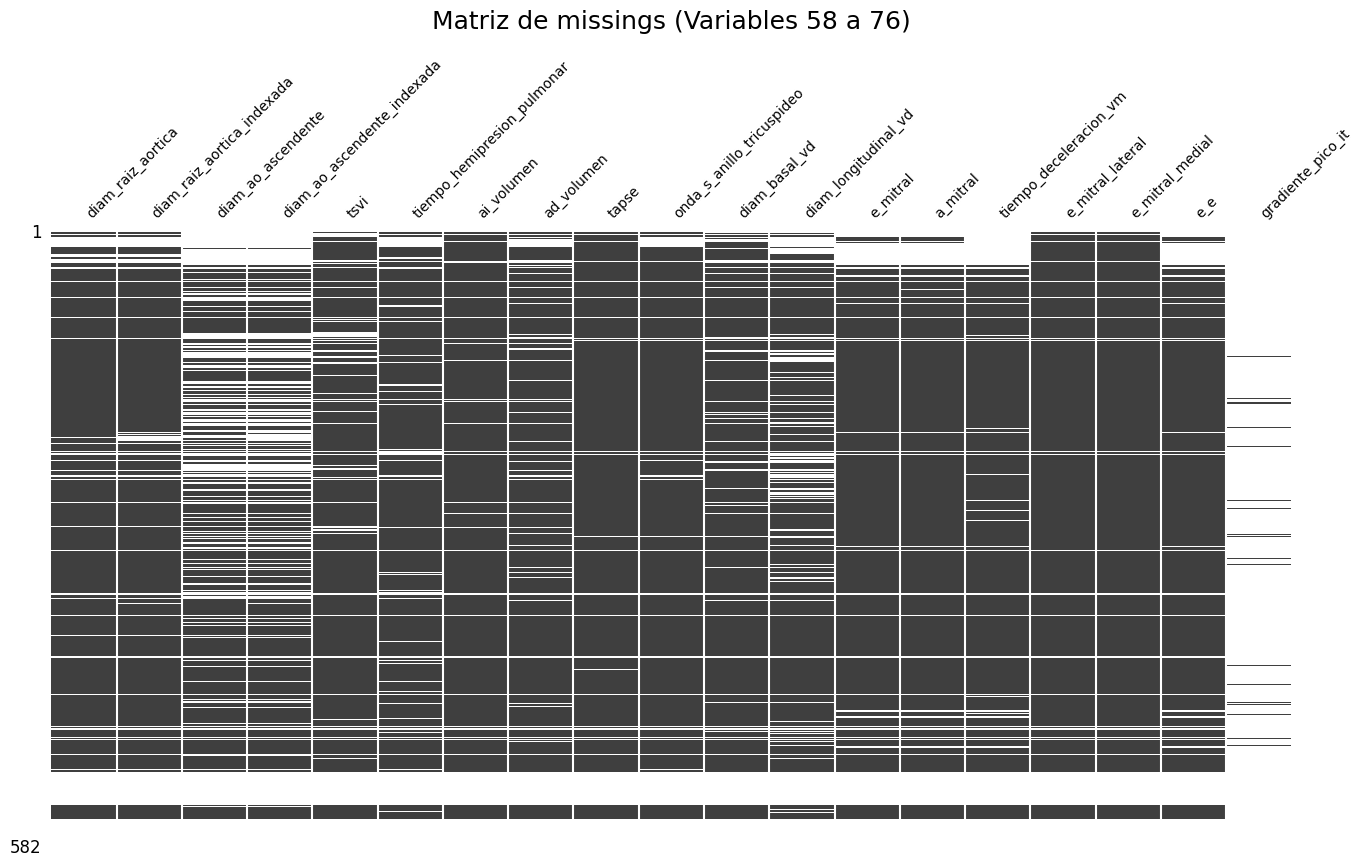

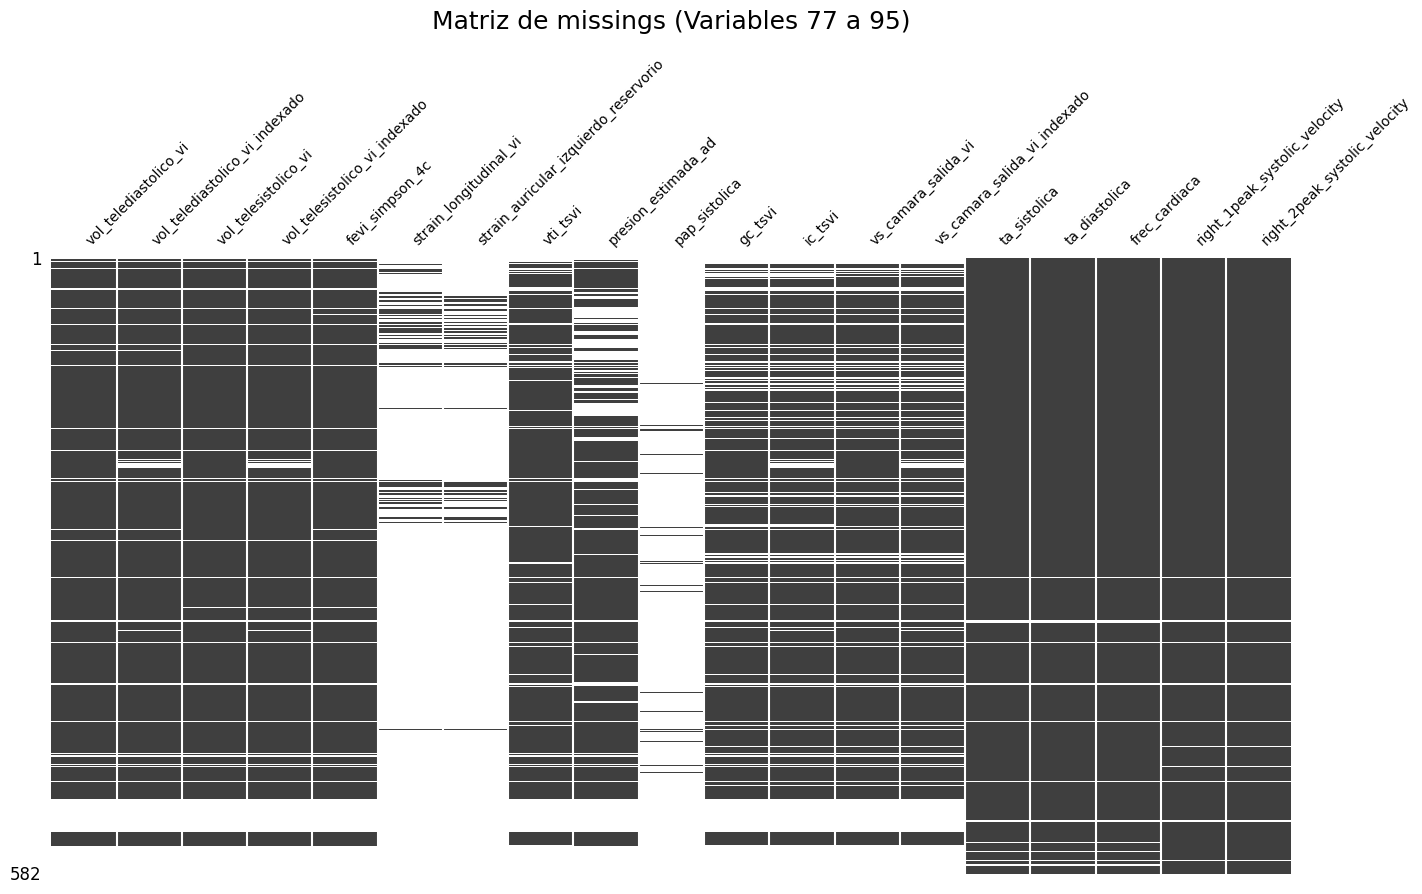

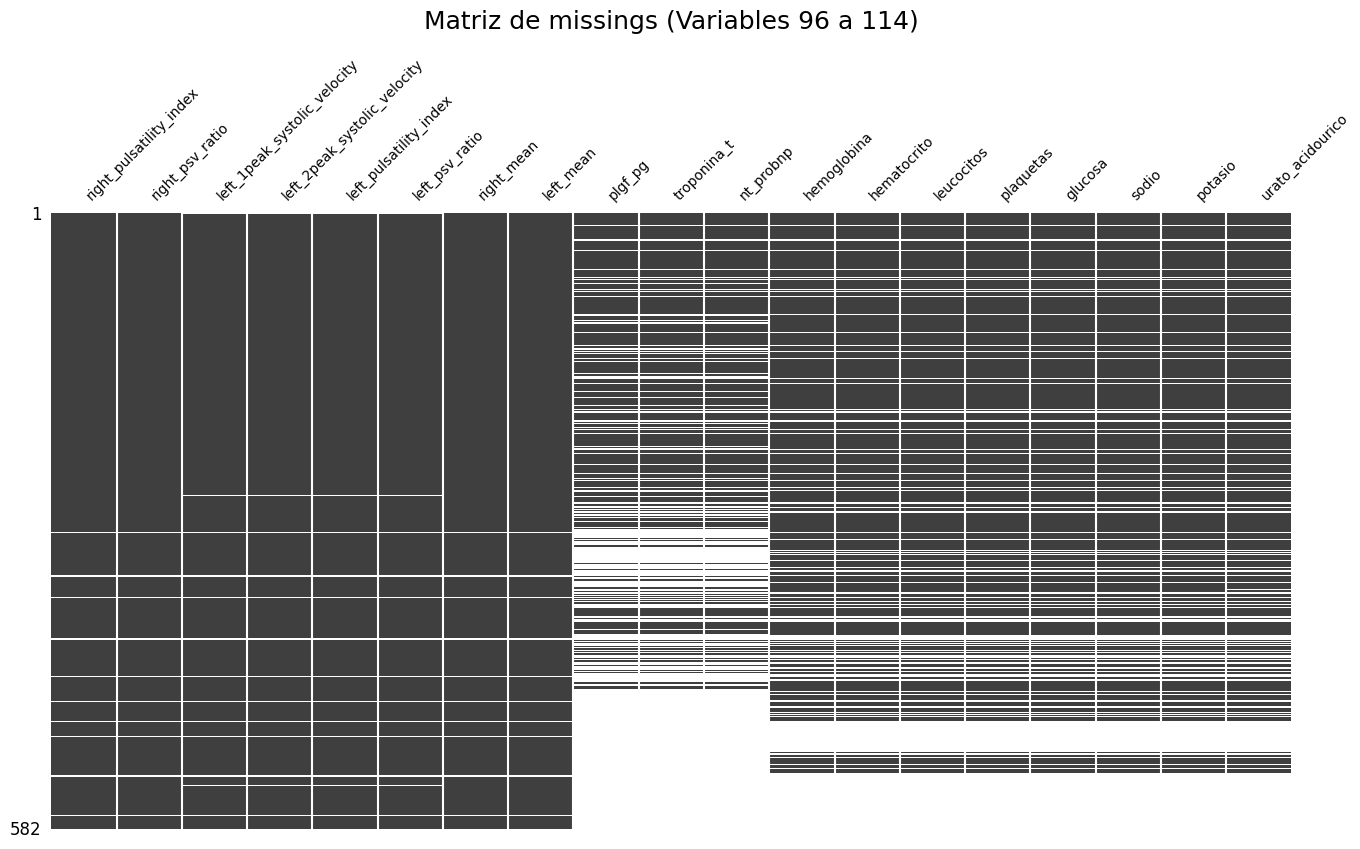

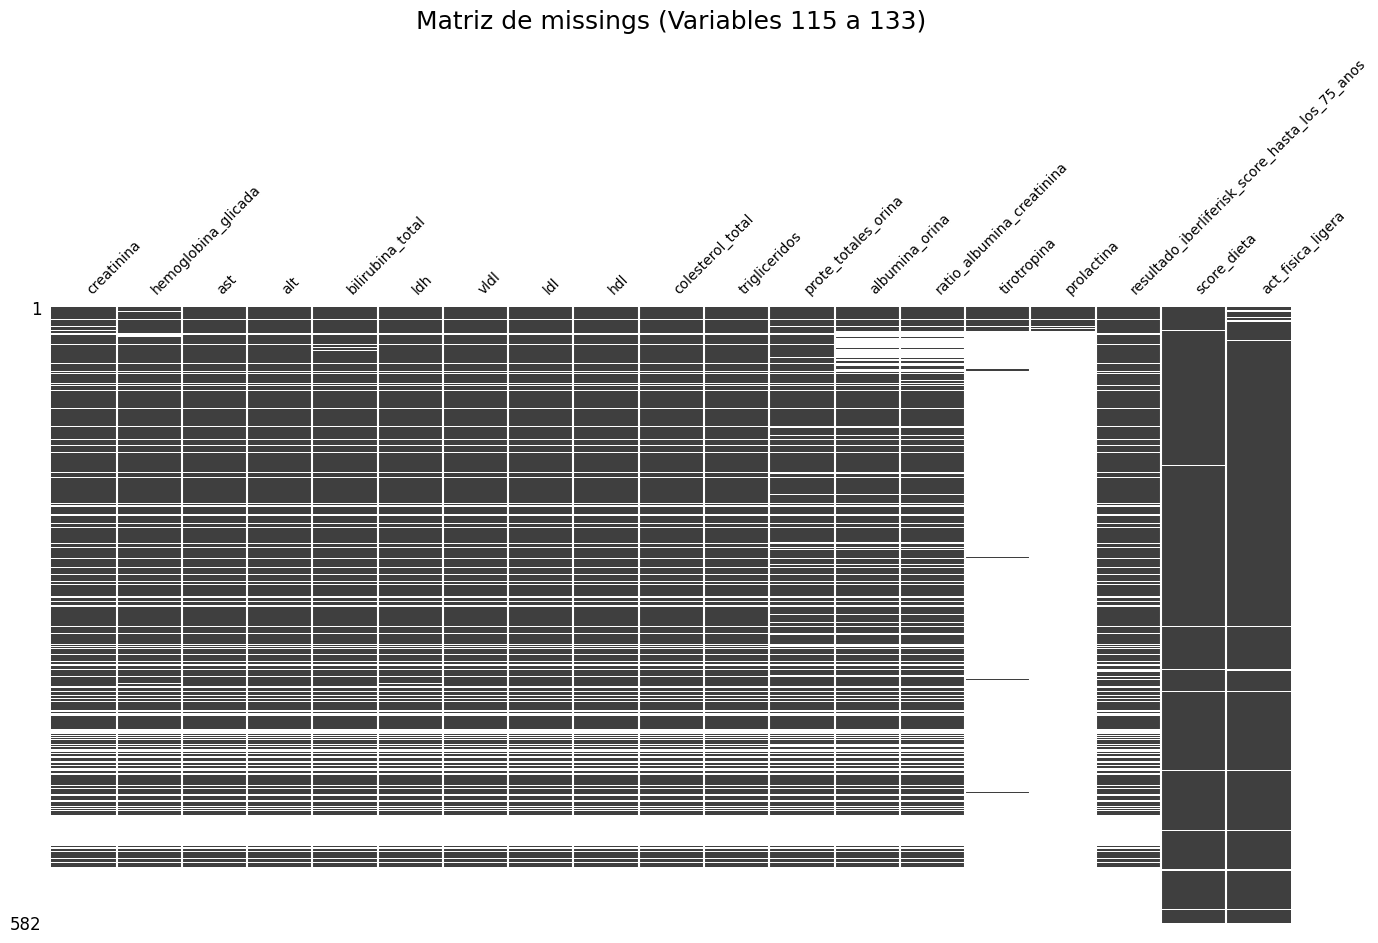

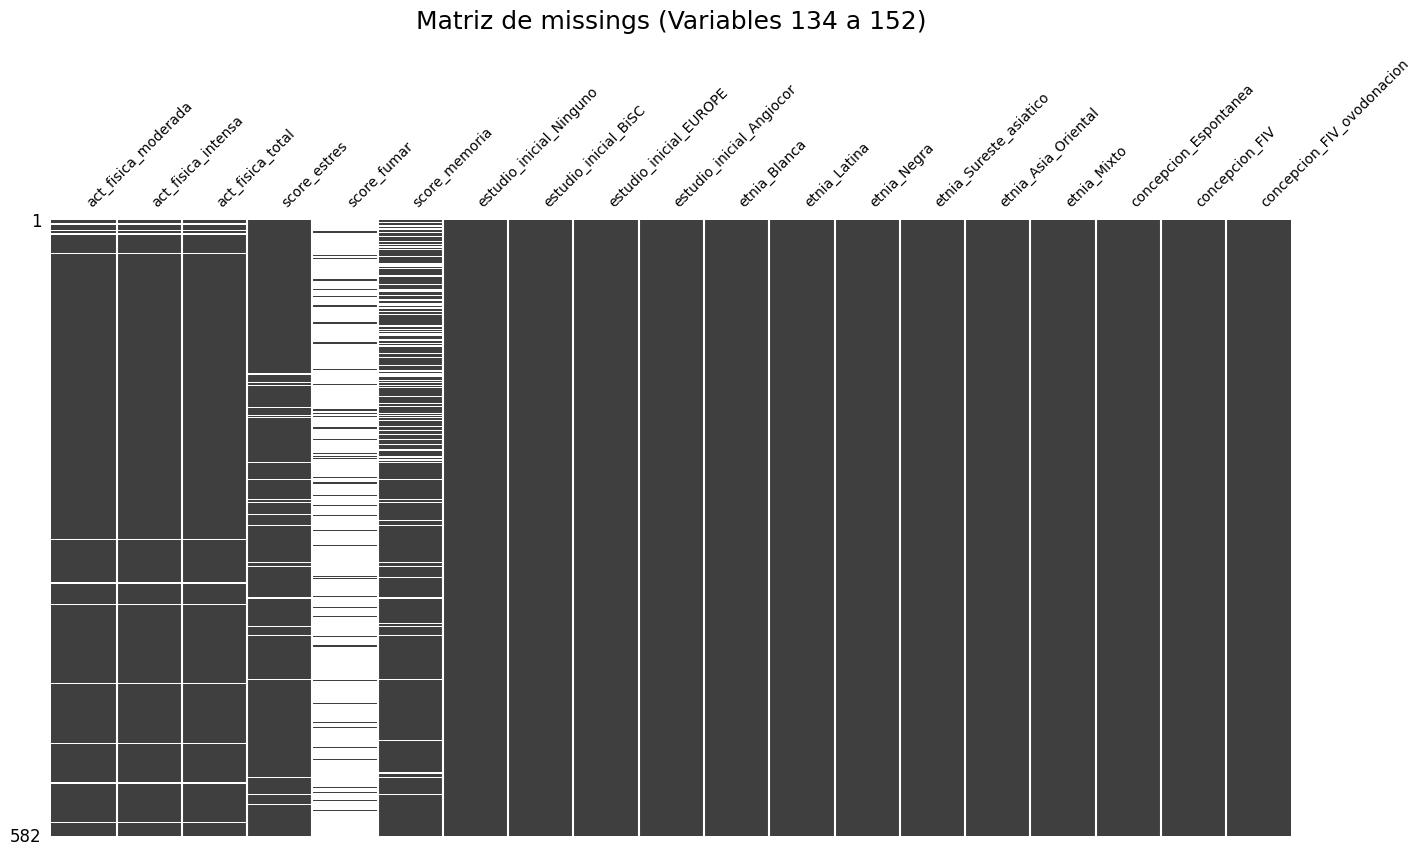

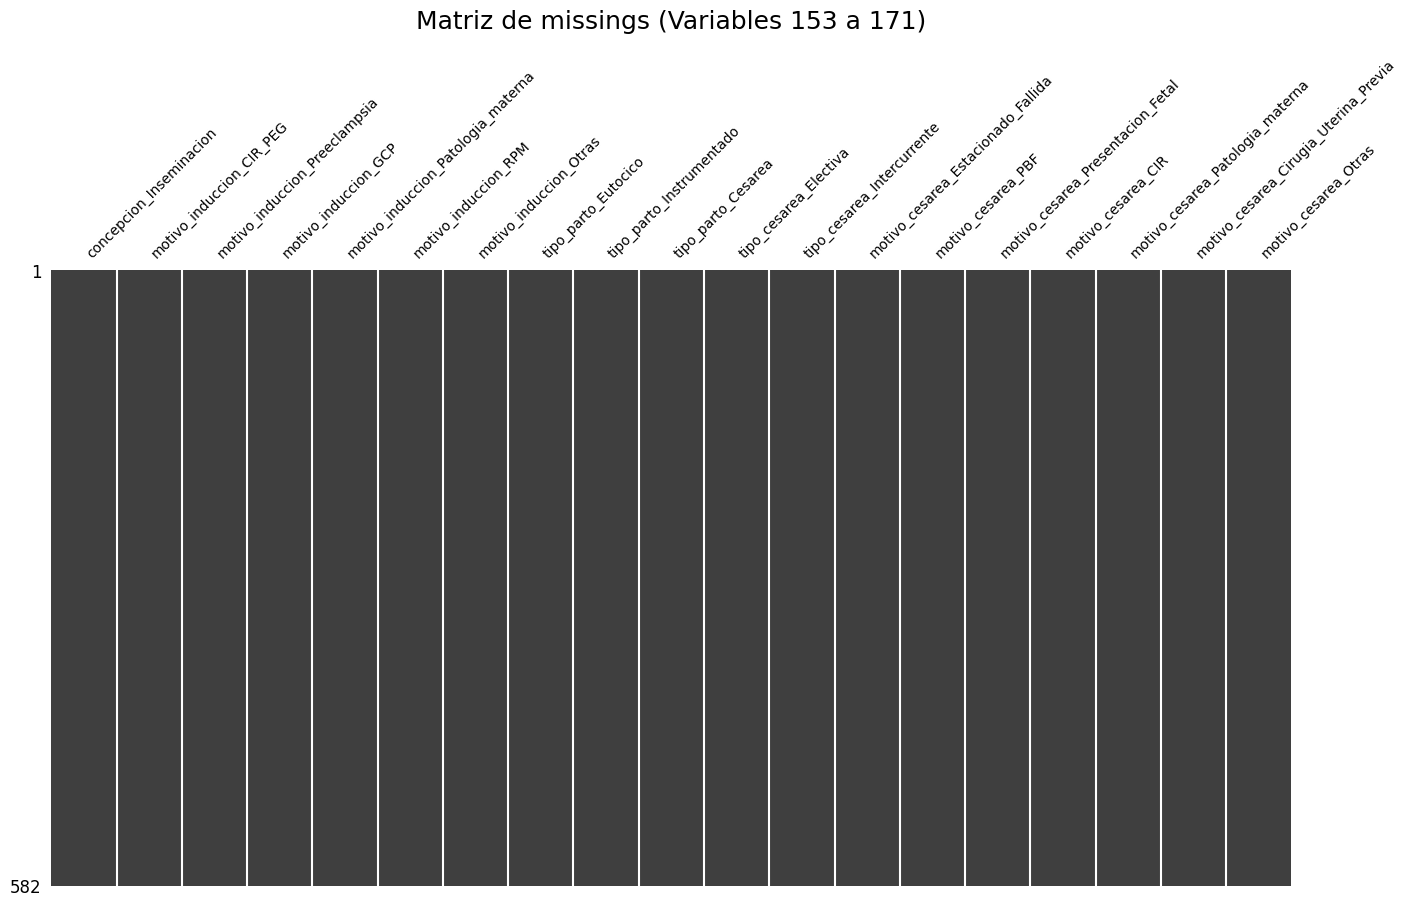

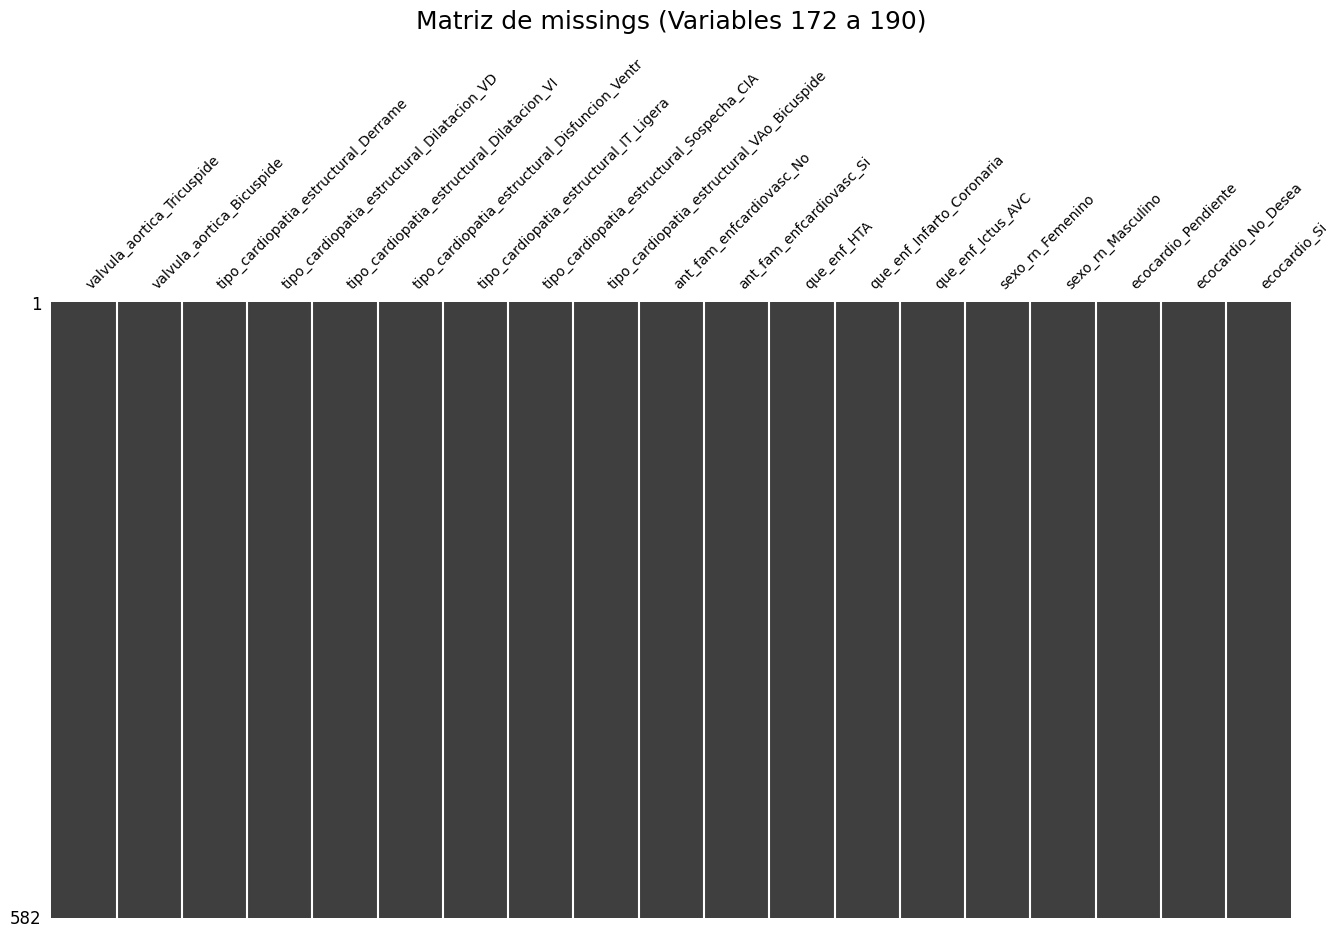

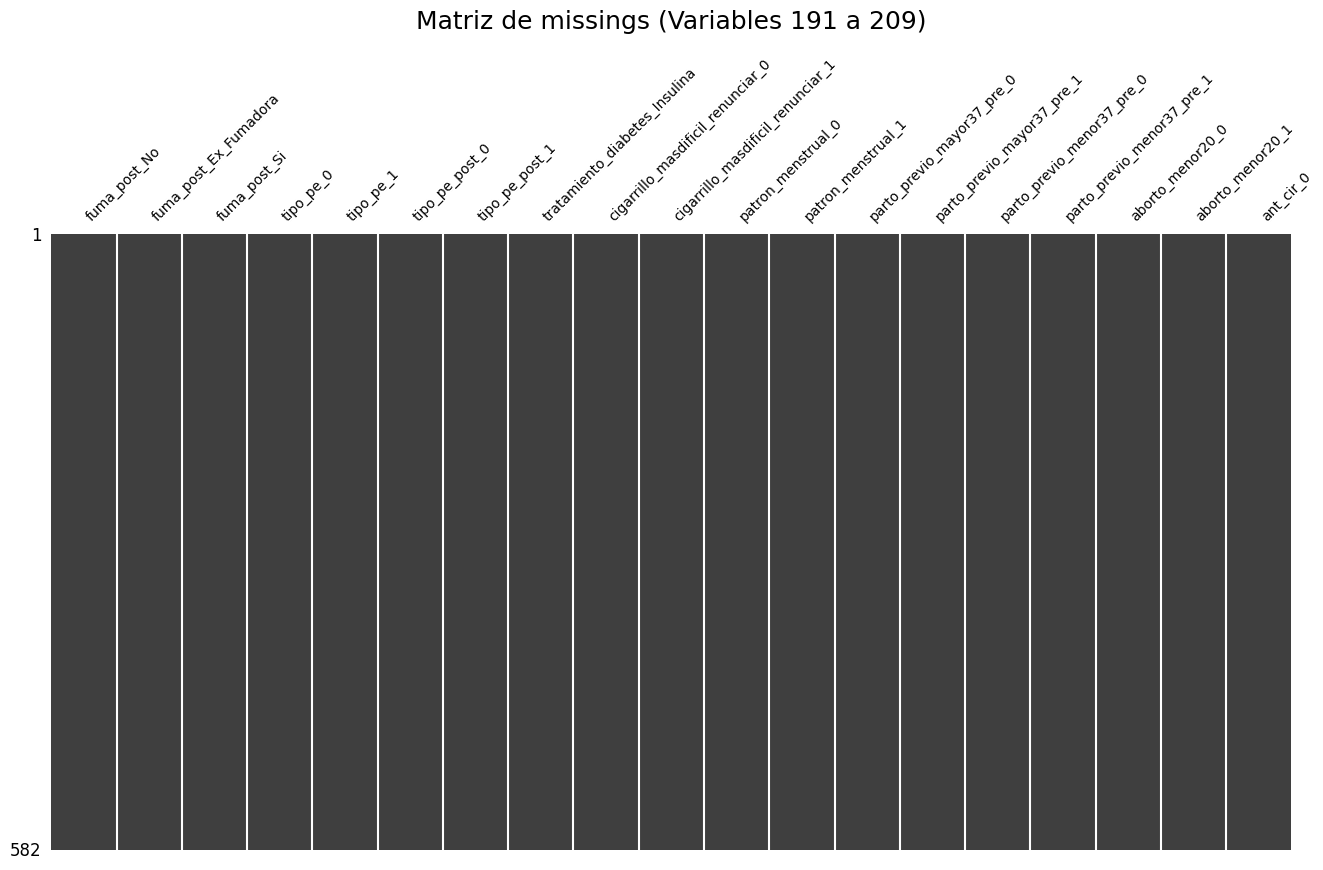

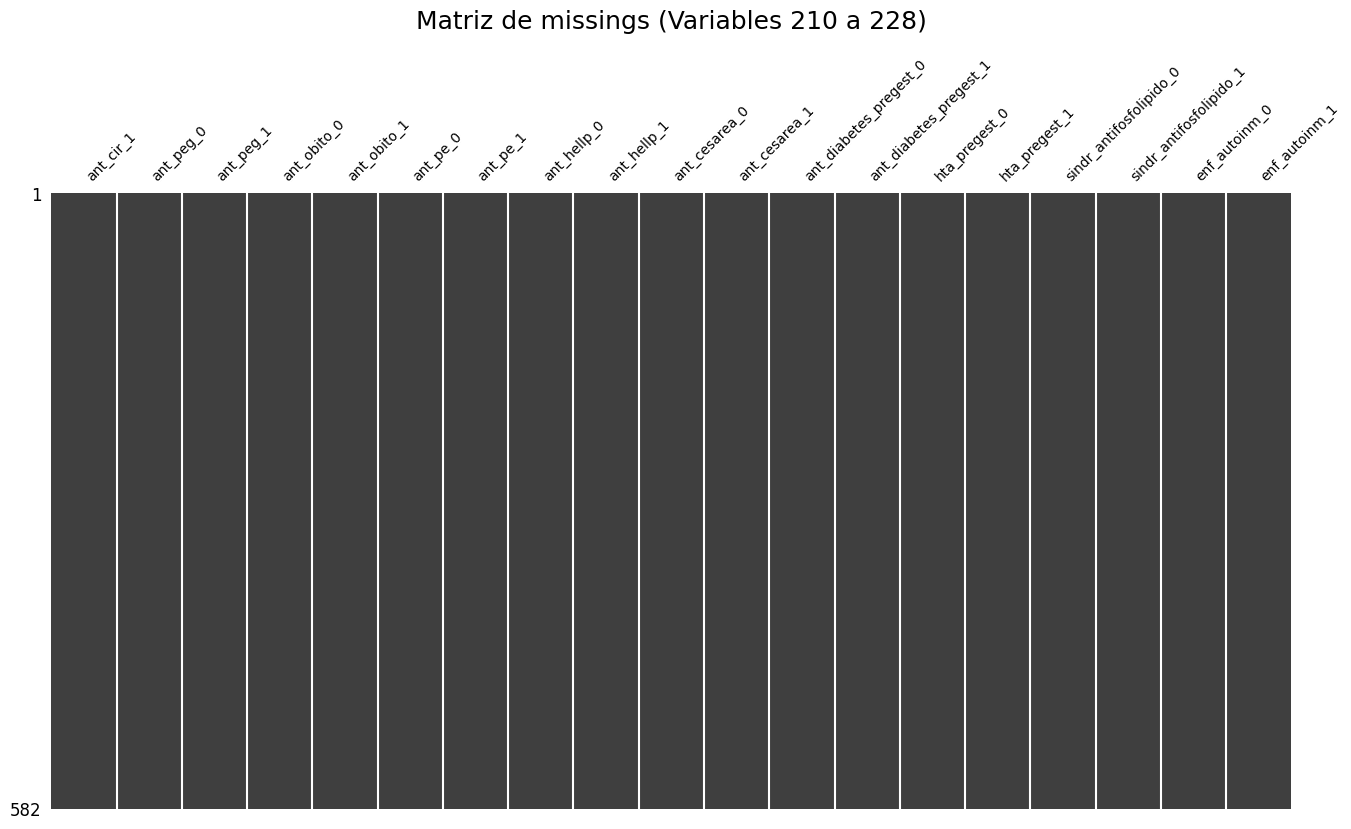

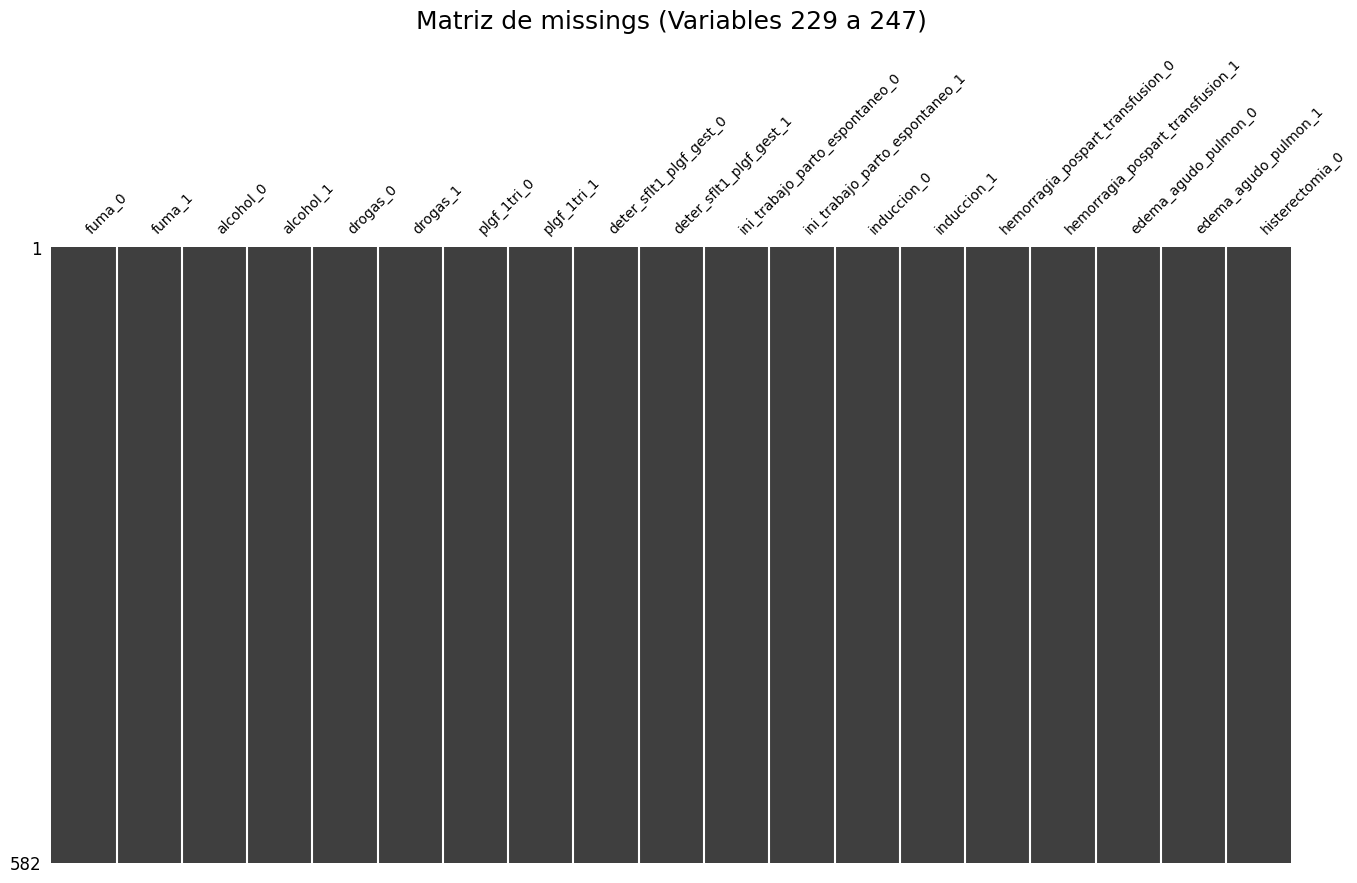

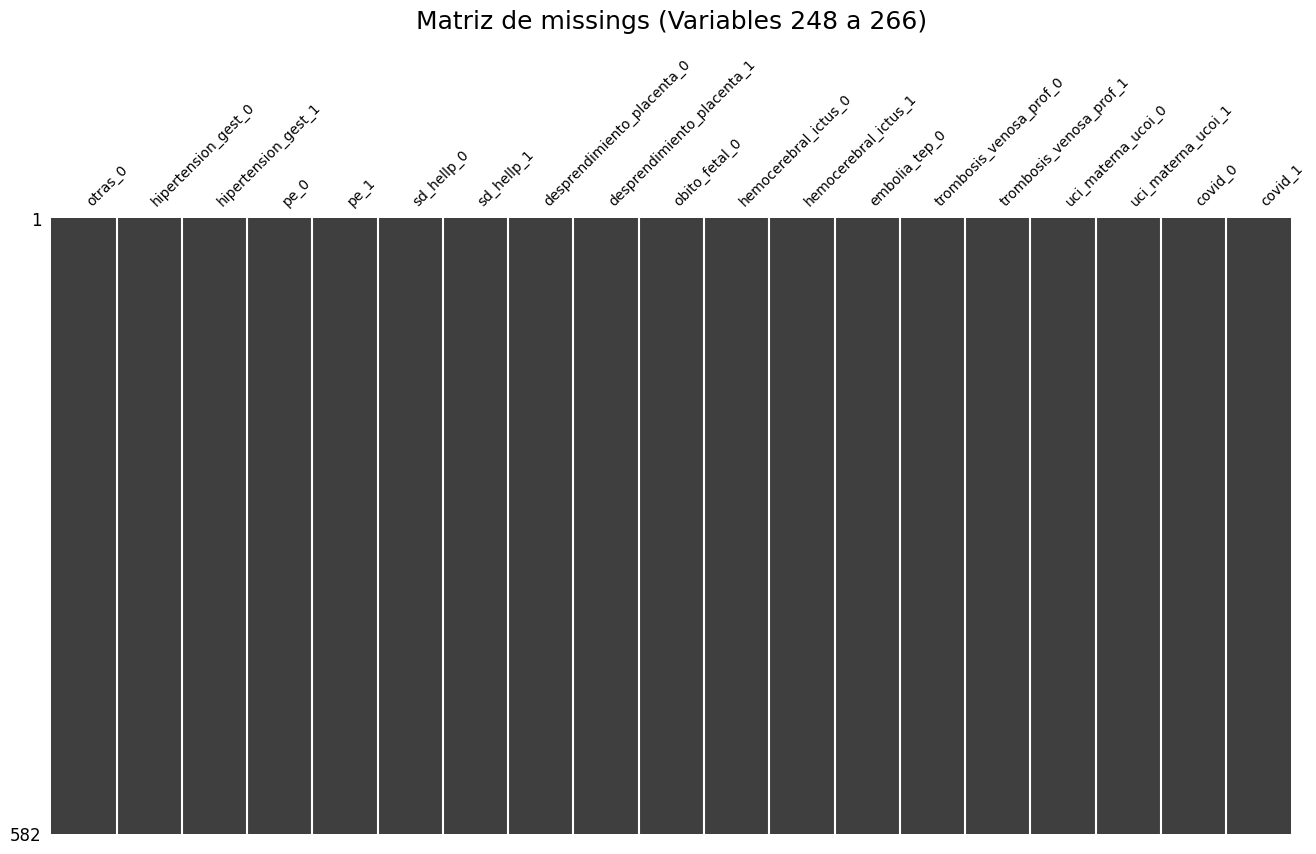

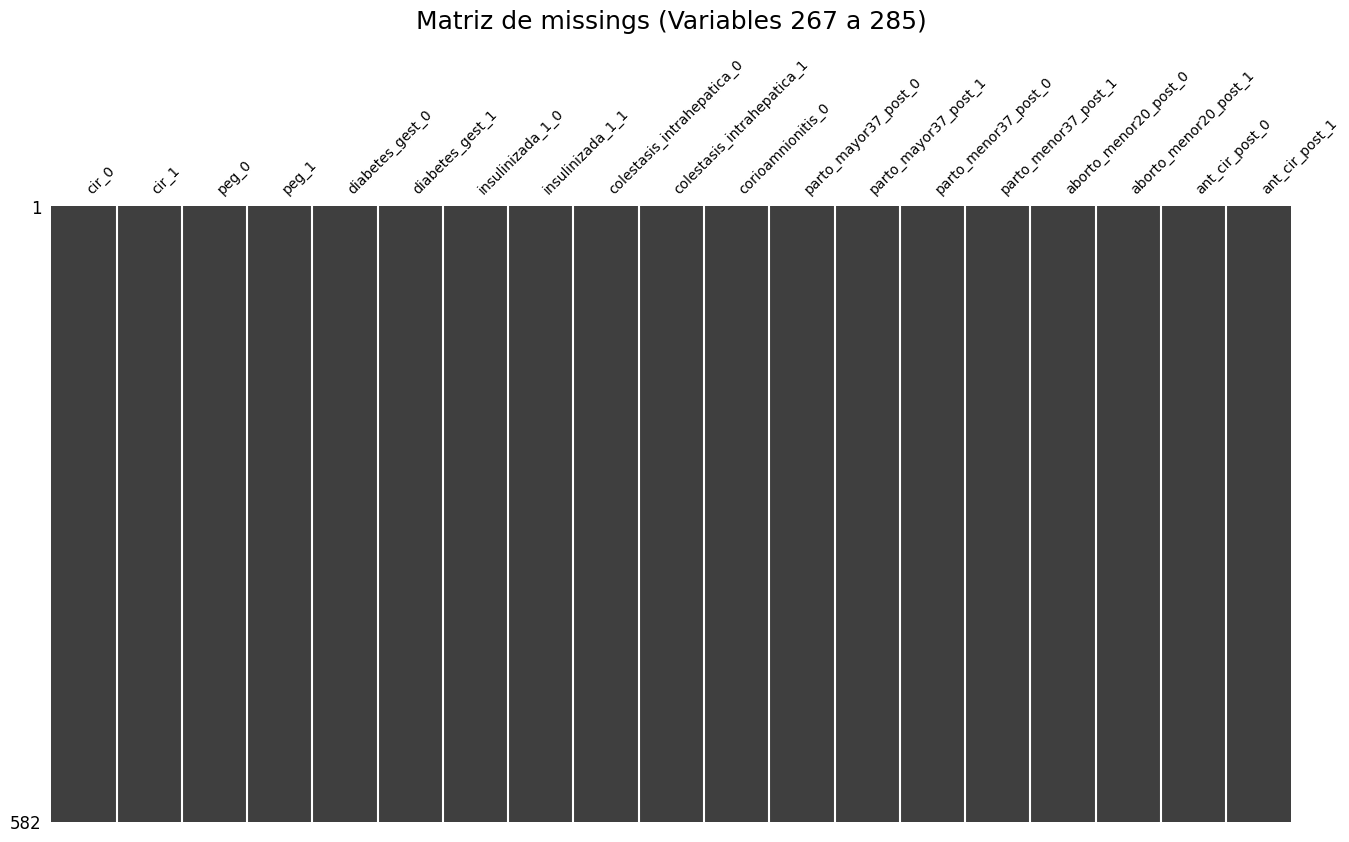

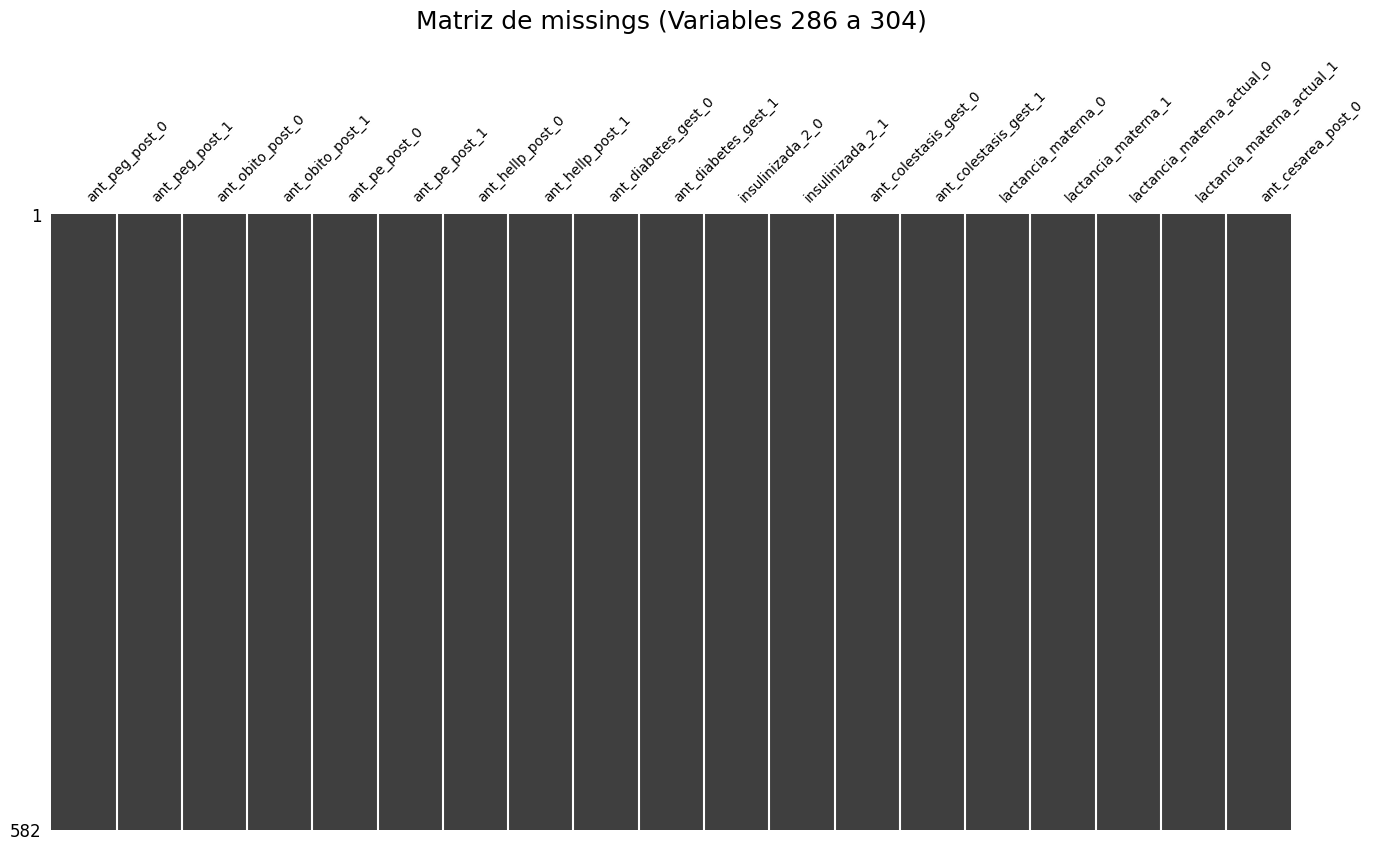

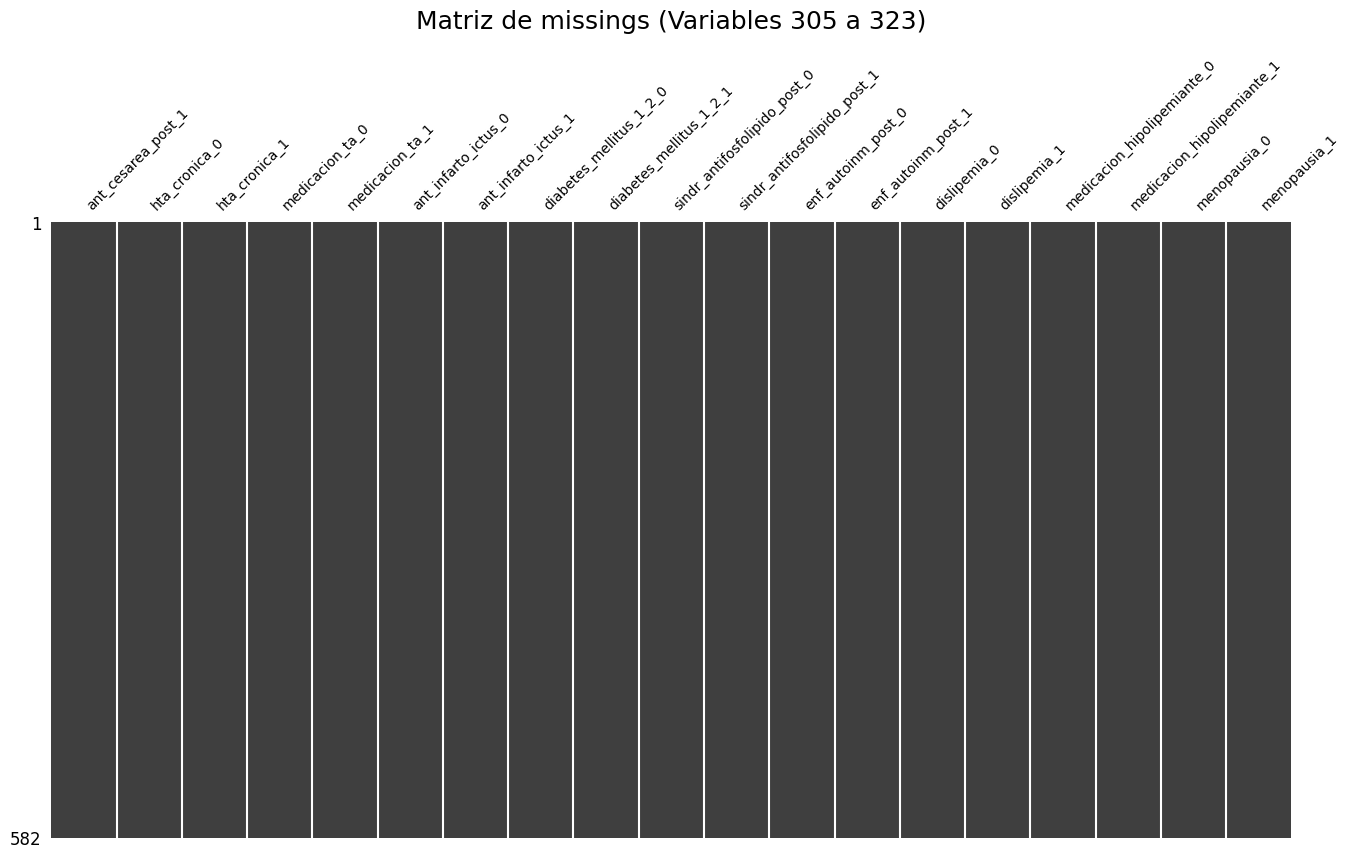

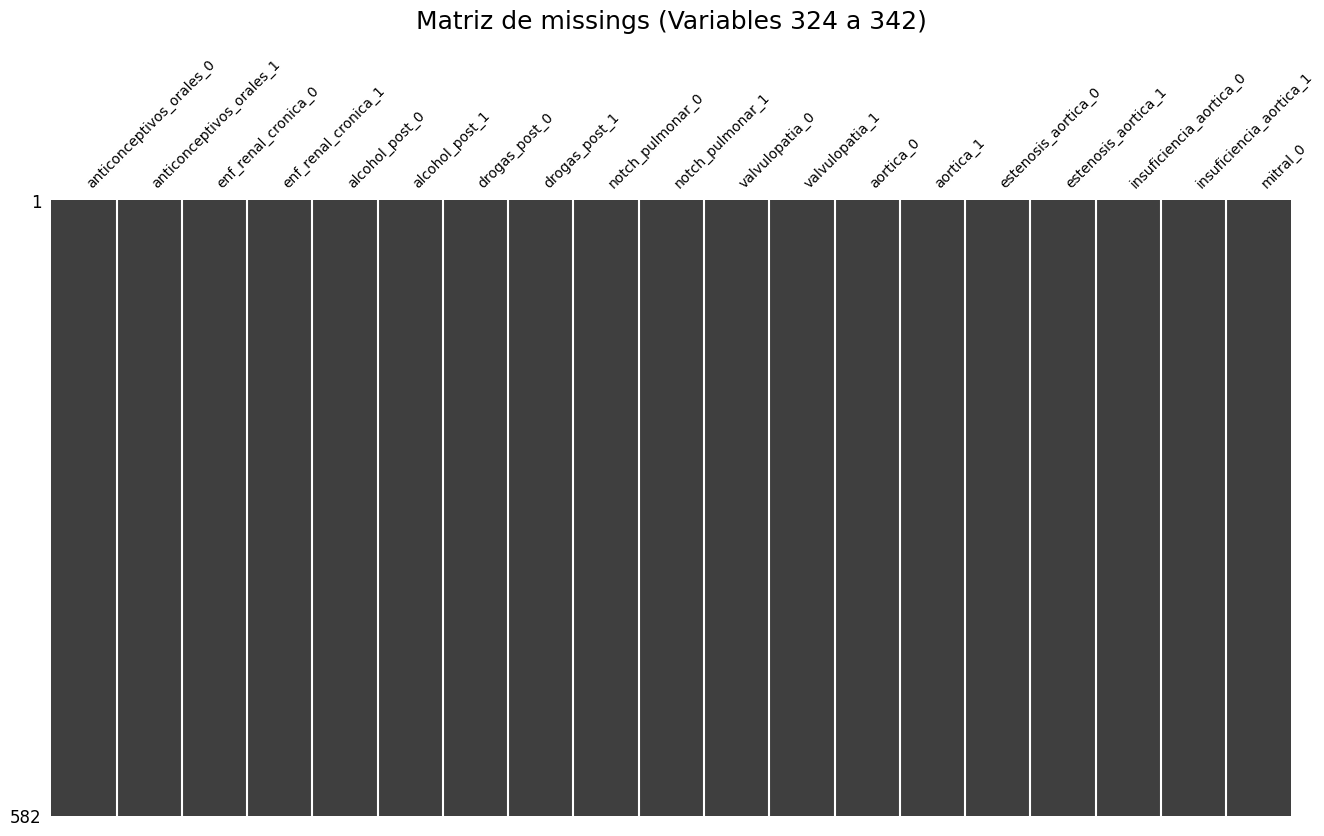

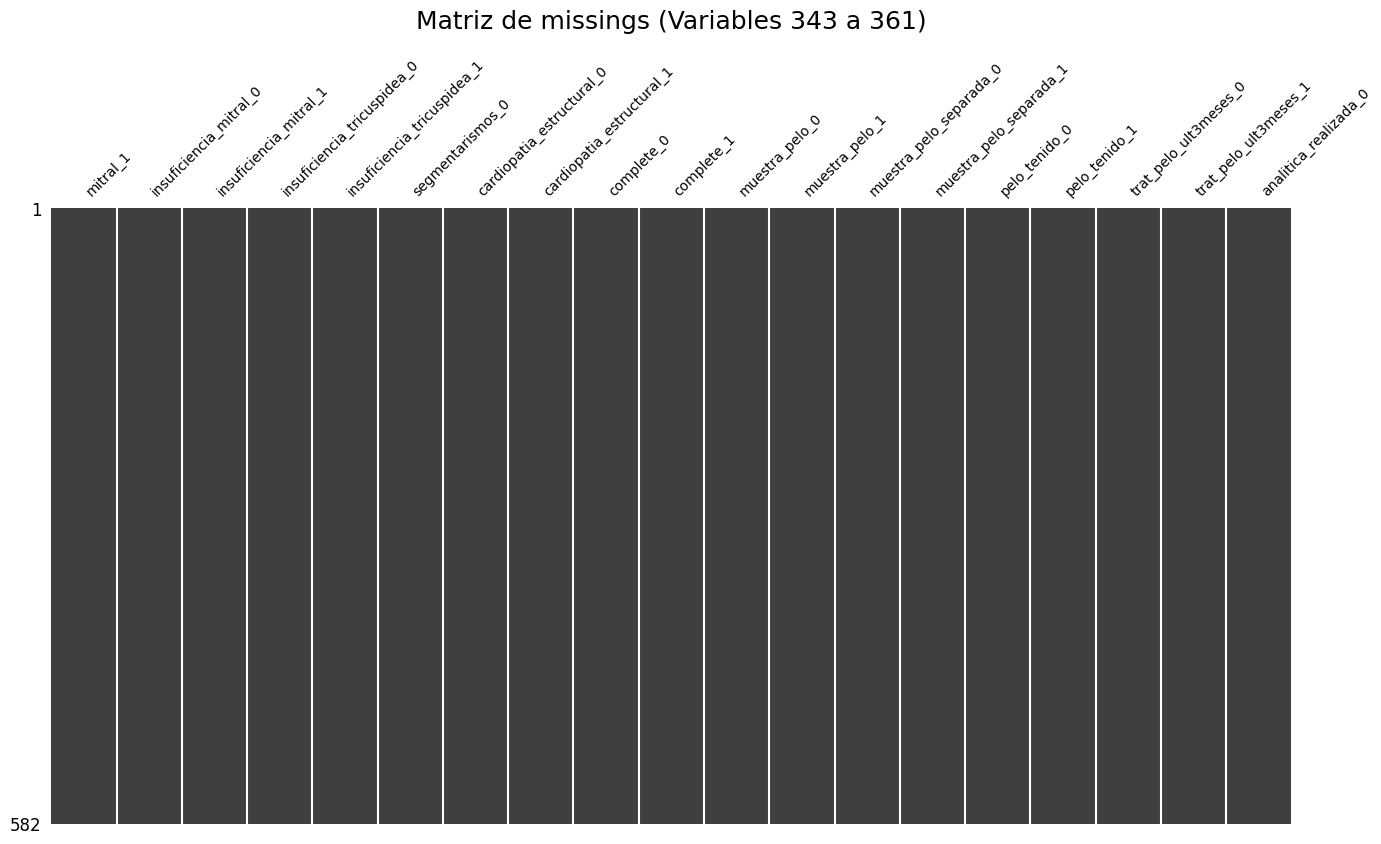

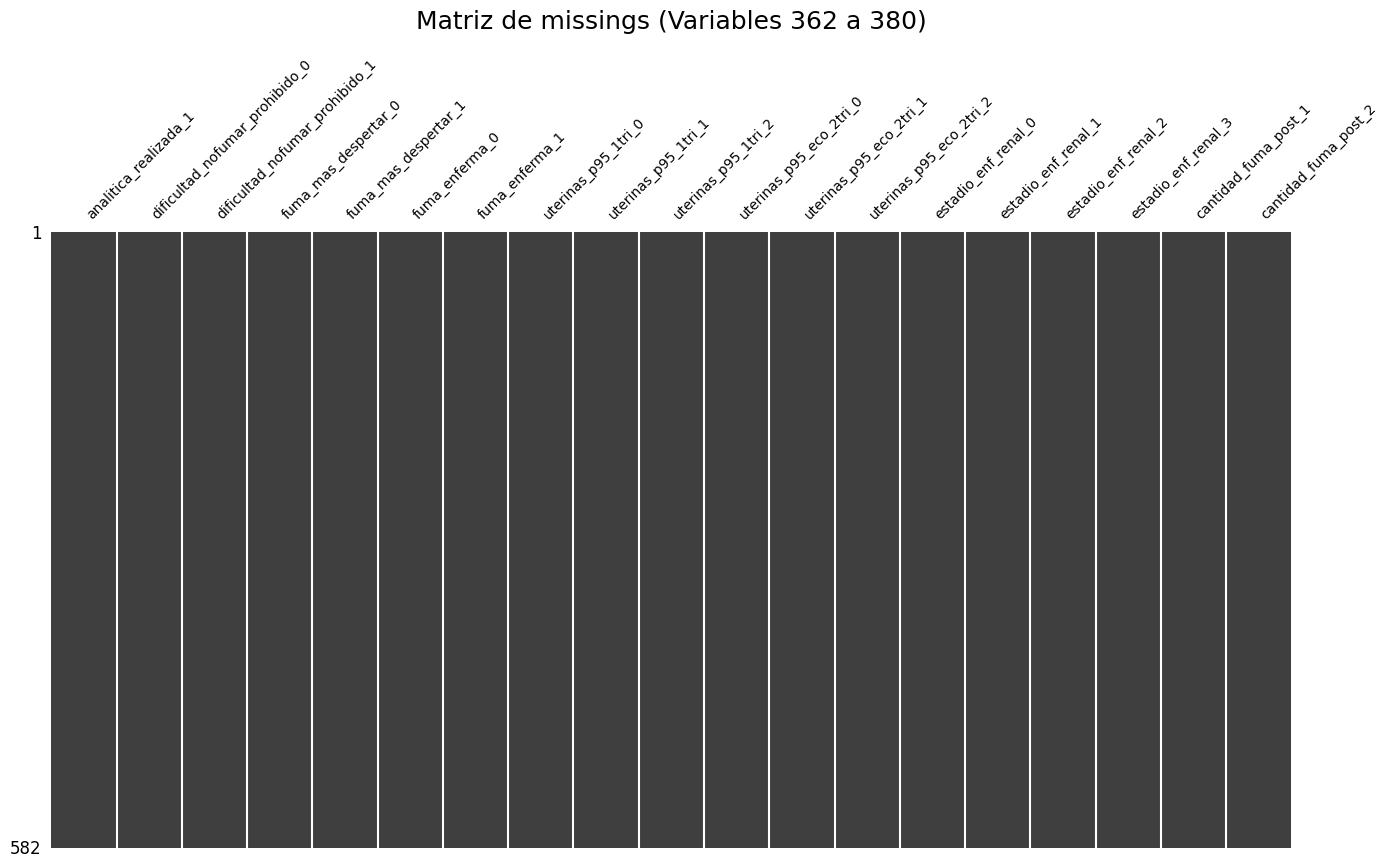

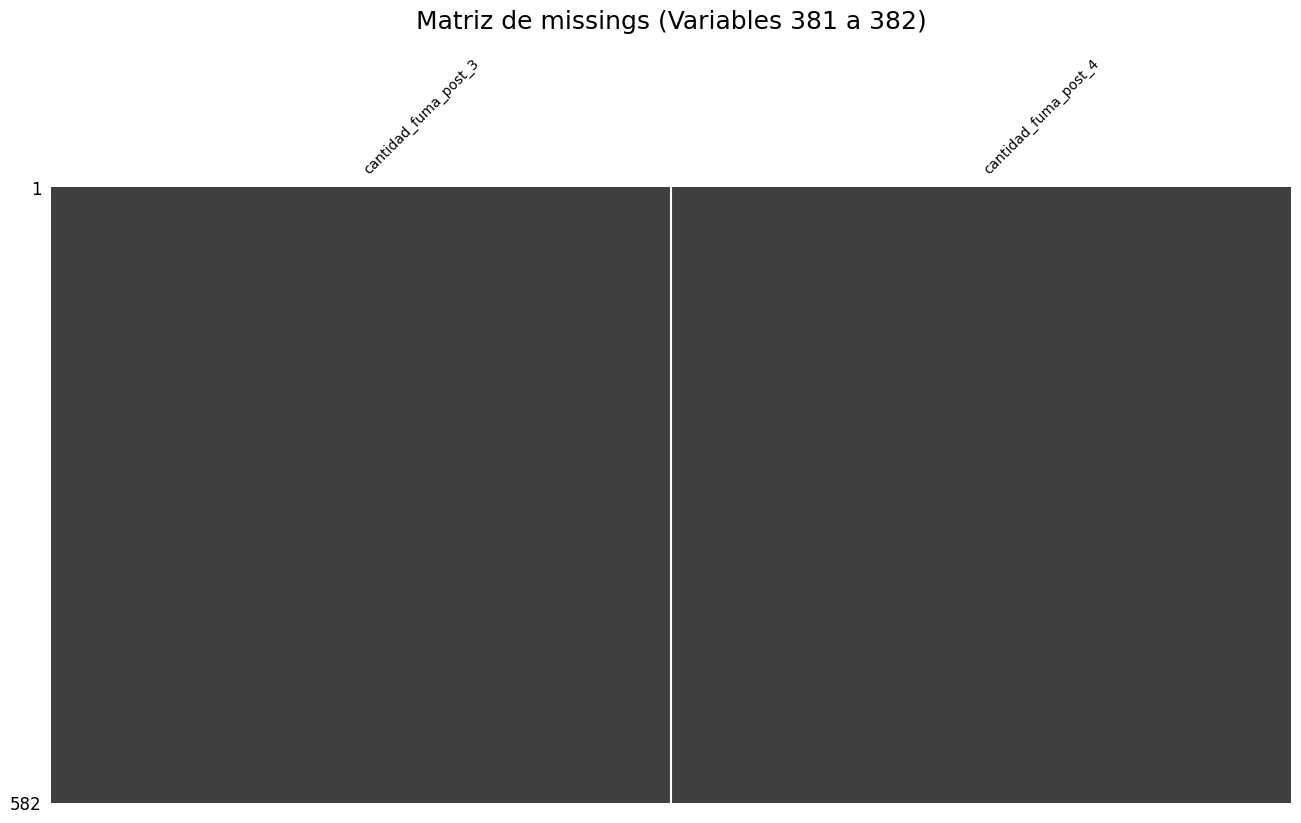

In [93]:
# Definimos las columnas y el tamaño del bloque
columnas = df_missing_num.columns.tolist()
tamano = 19 

# Bucle para generar una matriz por cada grupo de columnas
for i in range(0, len(columnas), tamano):
    # Seleccionamos el subconjunto de columnas
    cols_chunk = columnas[i : i + tamano]
    
    # Creamos la matriz para este bloque
    # 'sparkline=False' para ocultar la línea de la derecha y ganar espacio
    msno.matrix(df_missing_num[cols_chunk], figsize=(16, 8), fontsize=10, sparkline = False)
    
    # Añadimos el título indicando qué variables estamos viendo
    plt.title(f"Matriz de missings (Variables {i+1} a {min(i+tamano, len(columnas))})", 
              fontsize=18, pad=20)
    
    plt.show()

#### Variables categóricas

In [94]:
# Seleccionamos solo las variables categóricas para el análisis de missings
df_missing_cat = df_cleaned.select_dtypes(include=['object', 'category'])
df_missing_cat.shape

(582, 167)

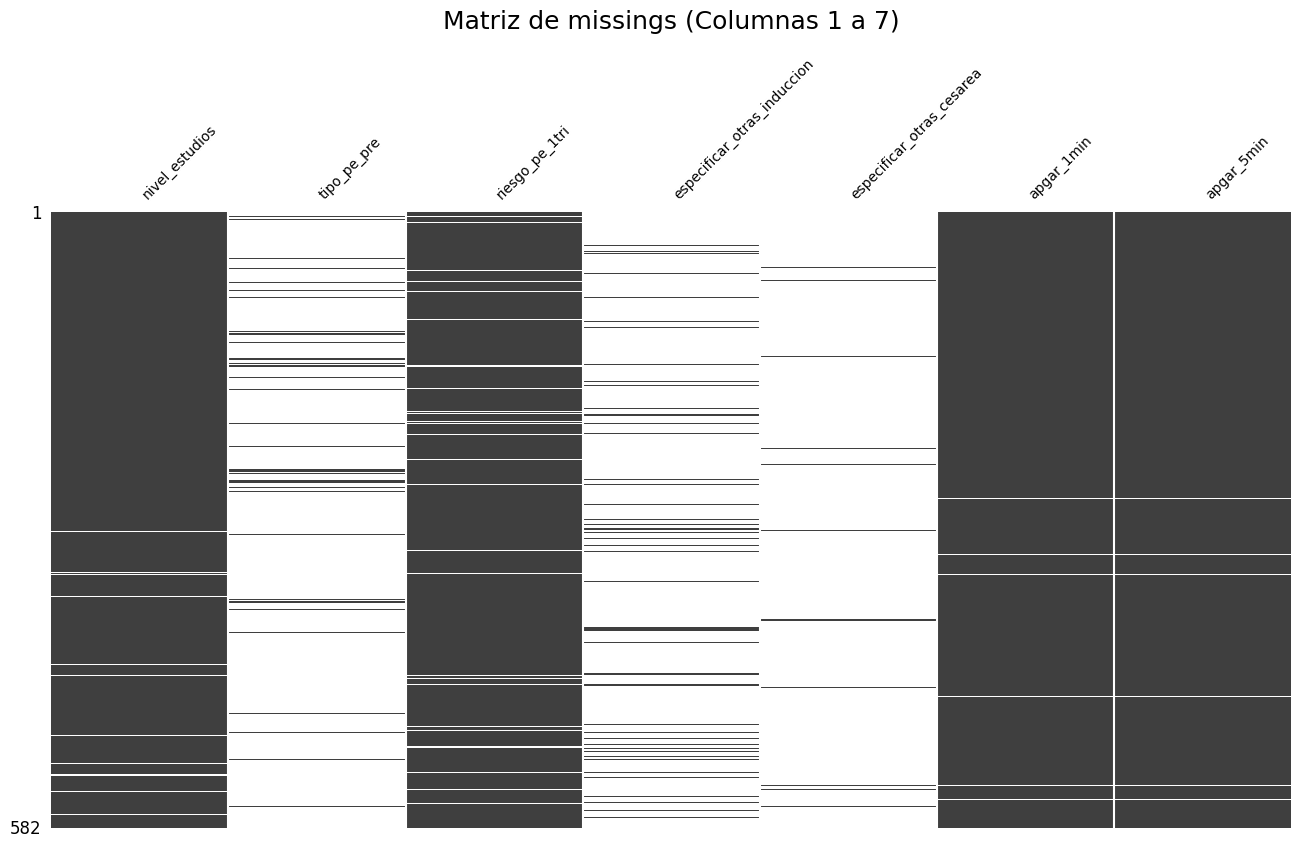

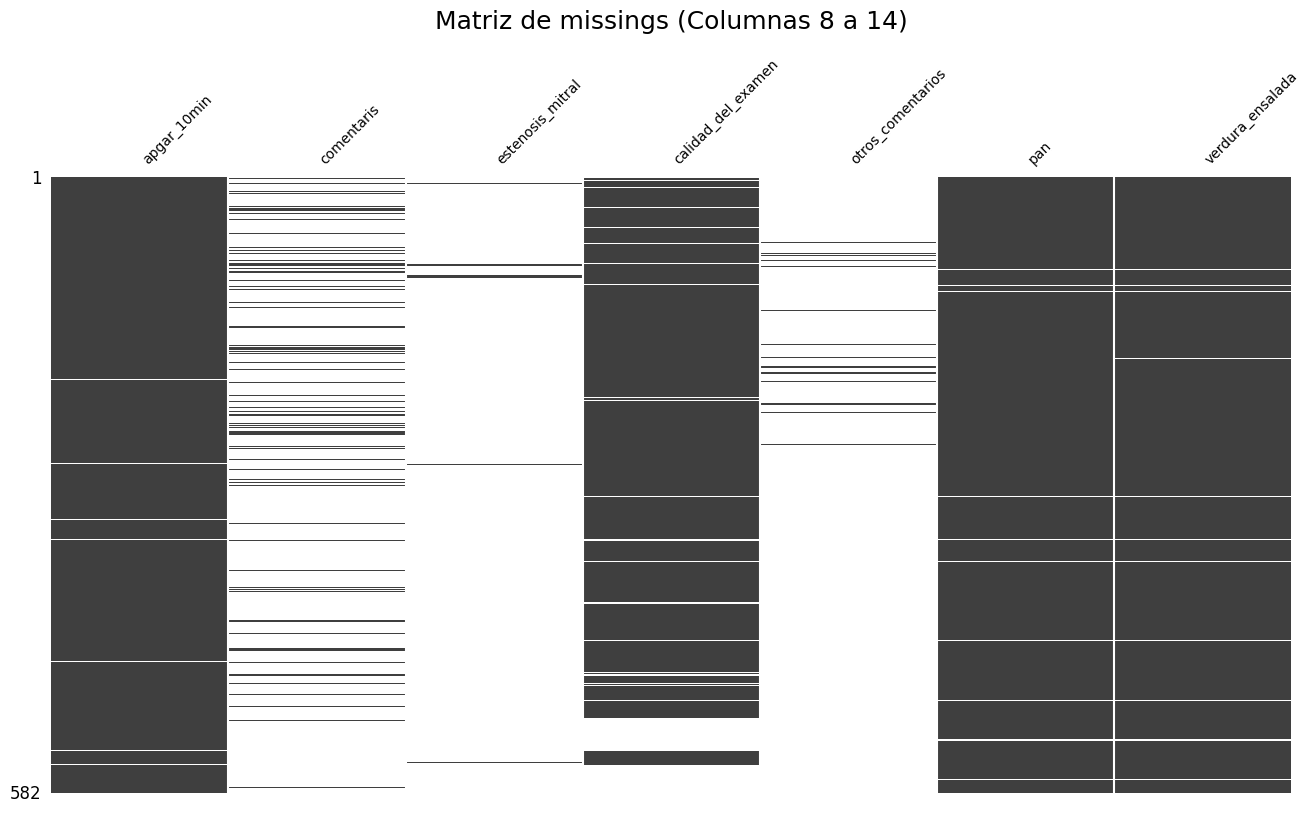

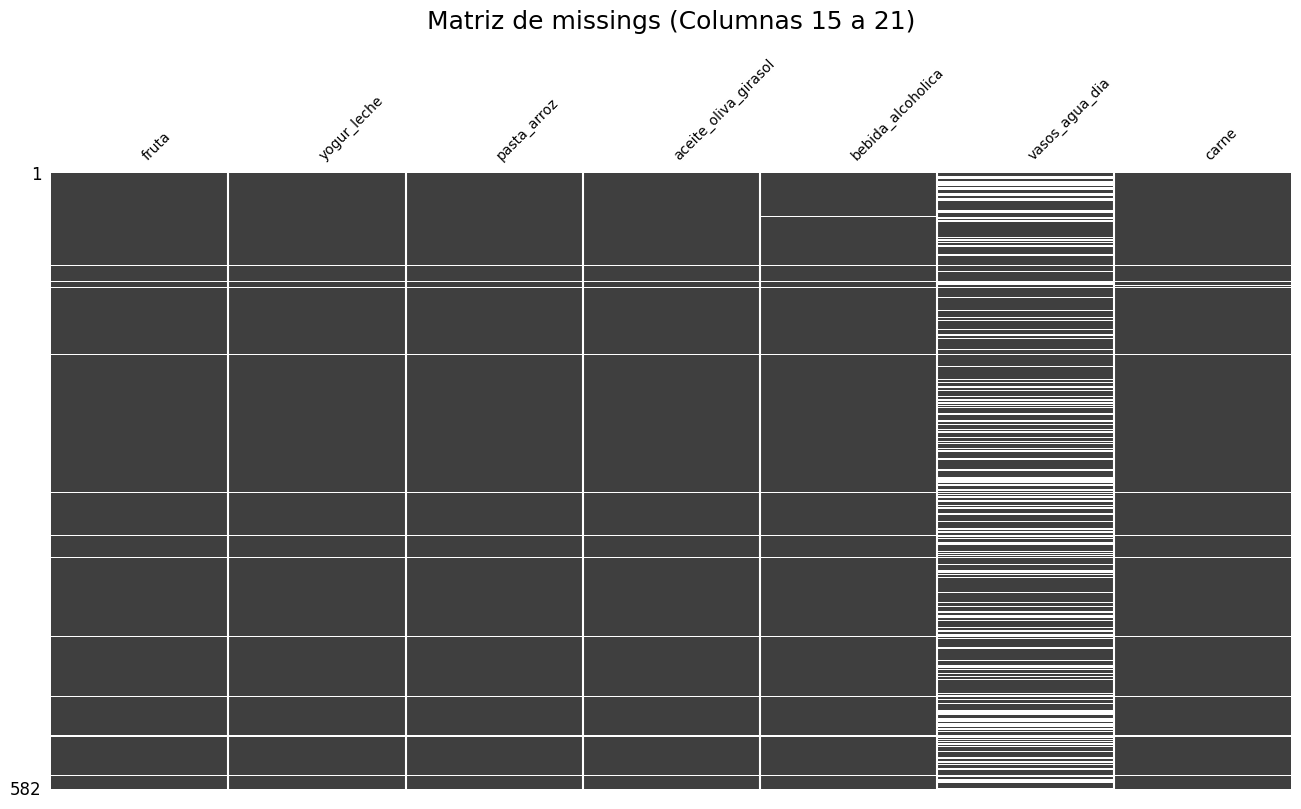

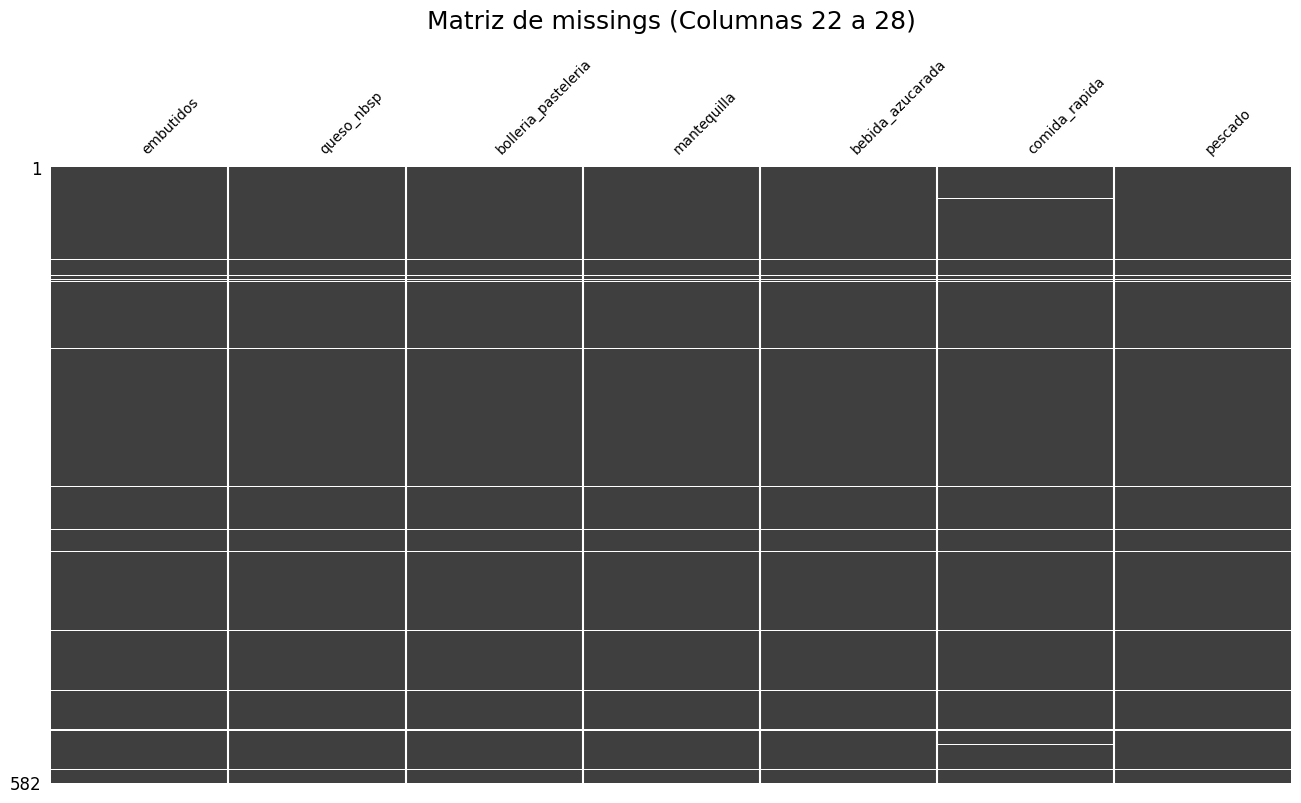

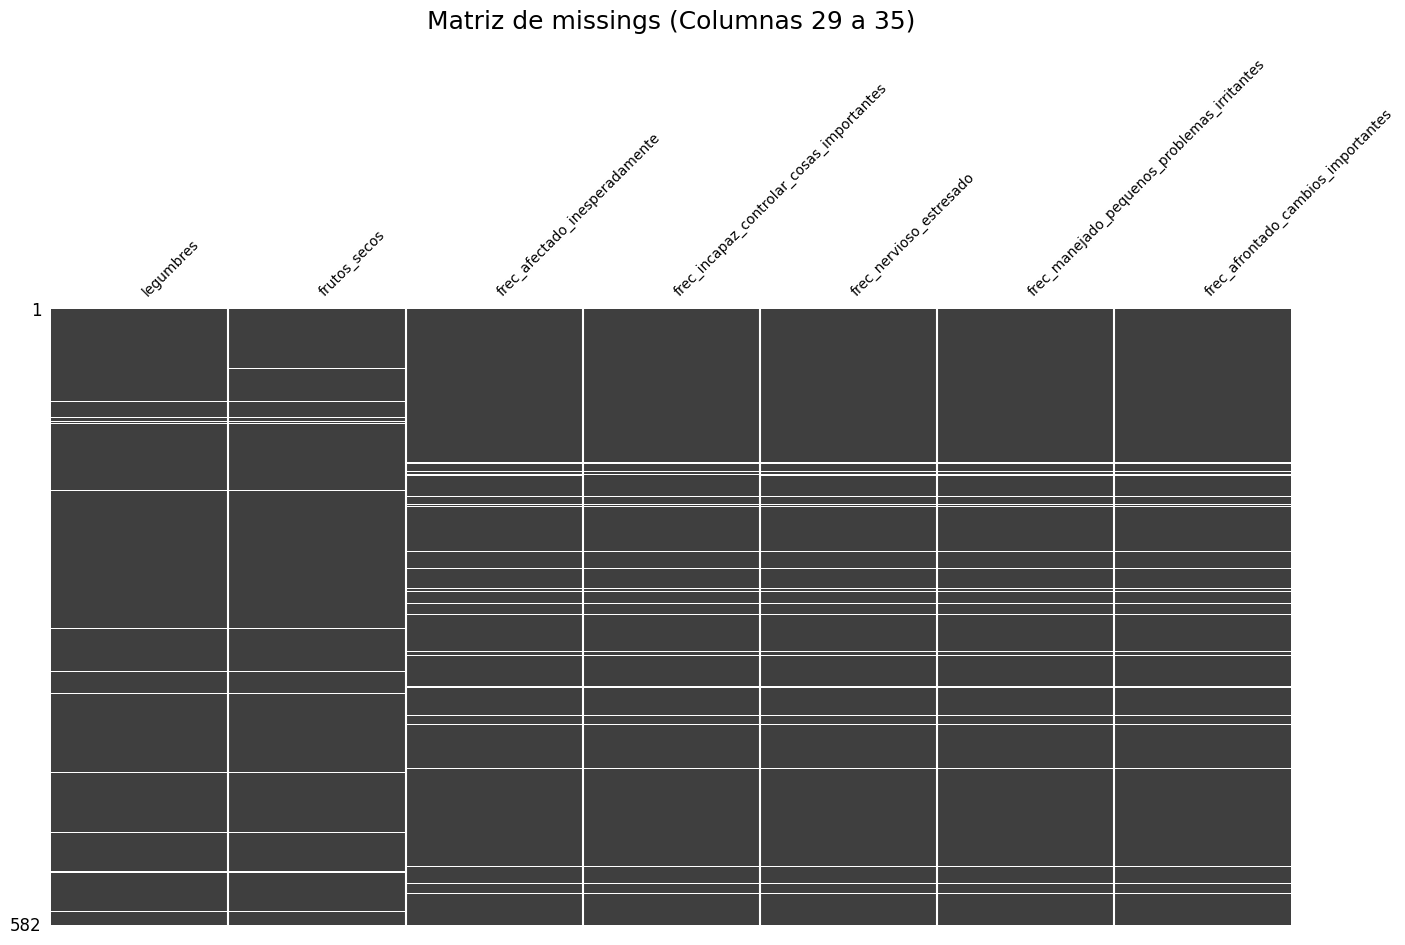

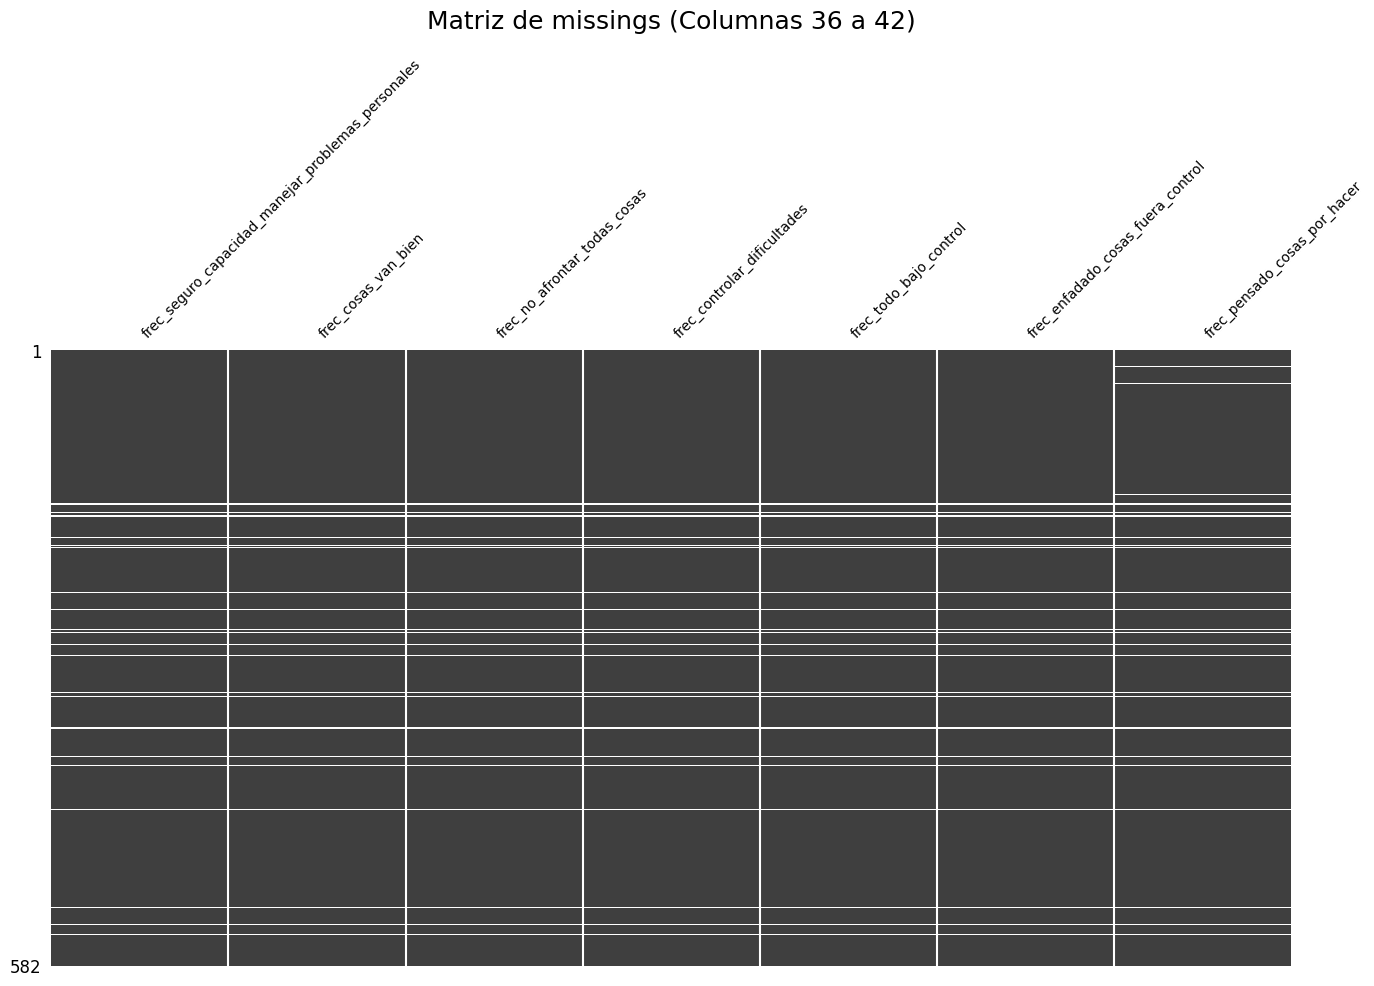

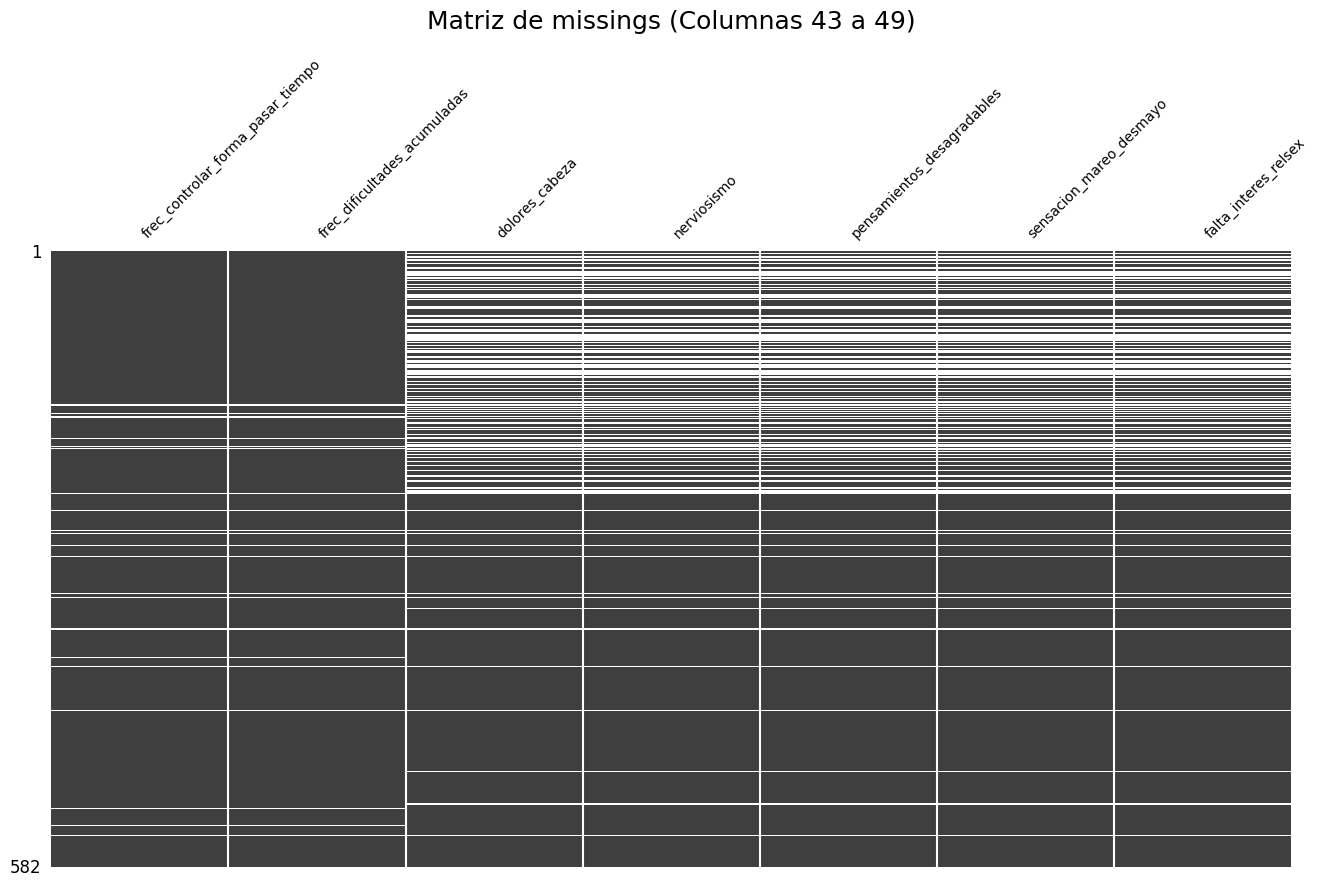

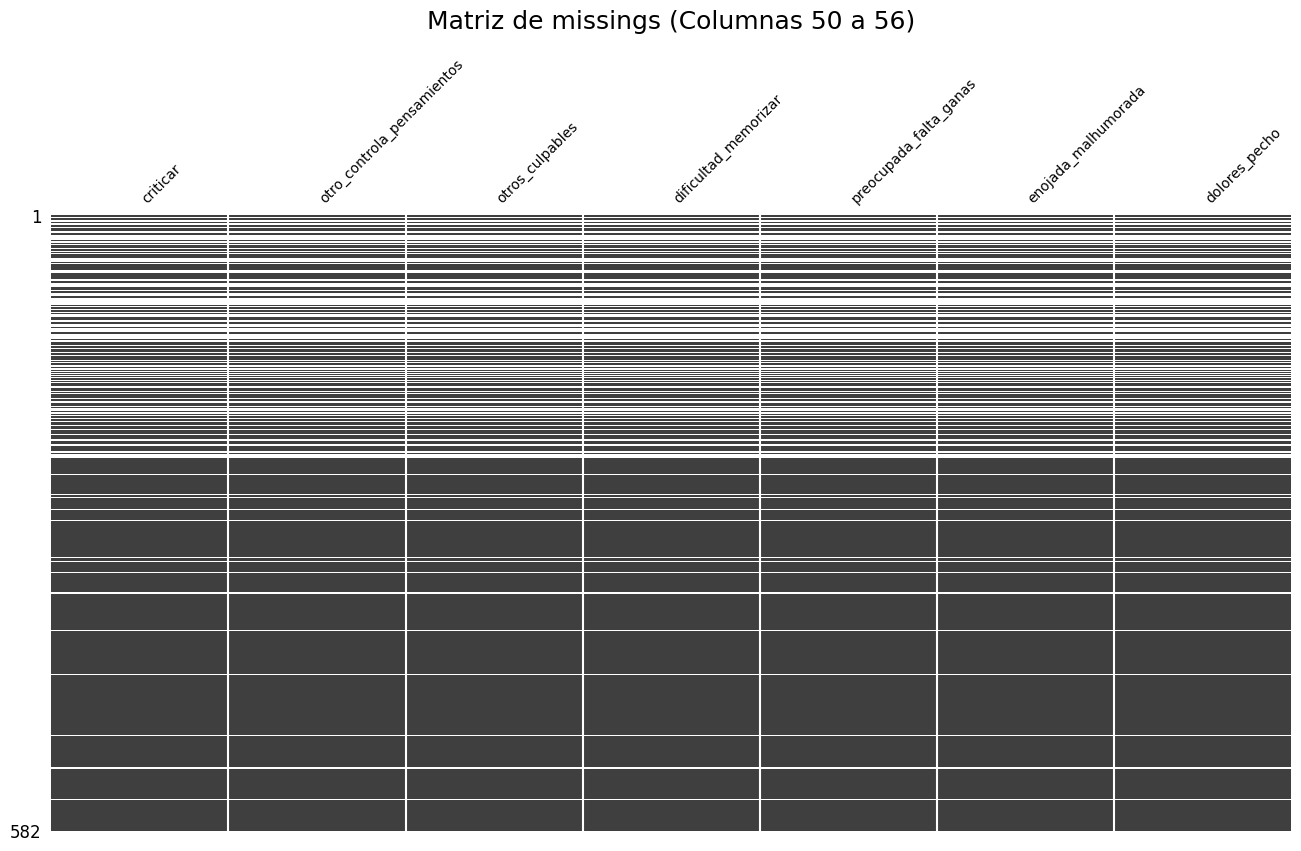

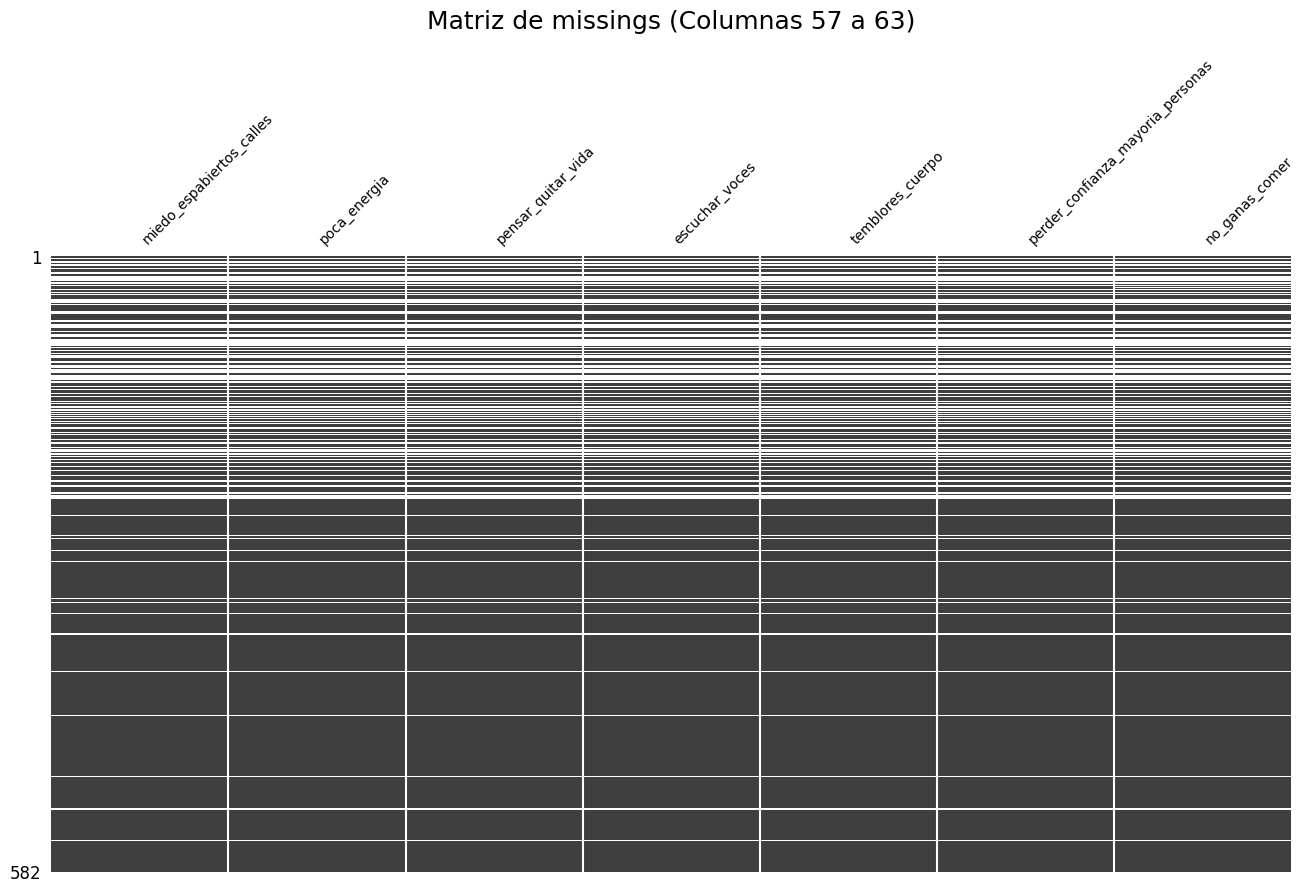

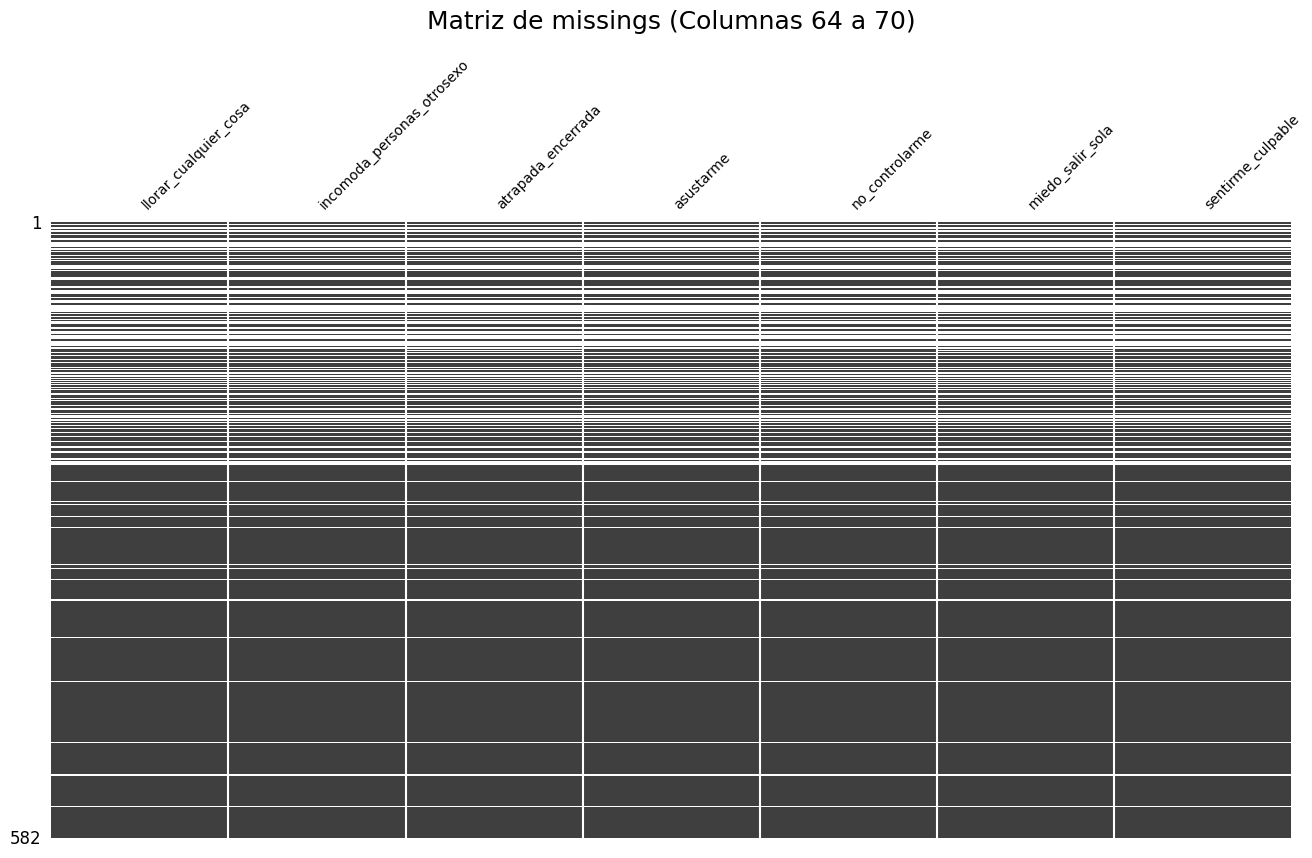

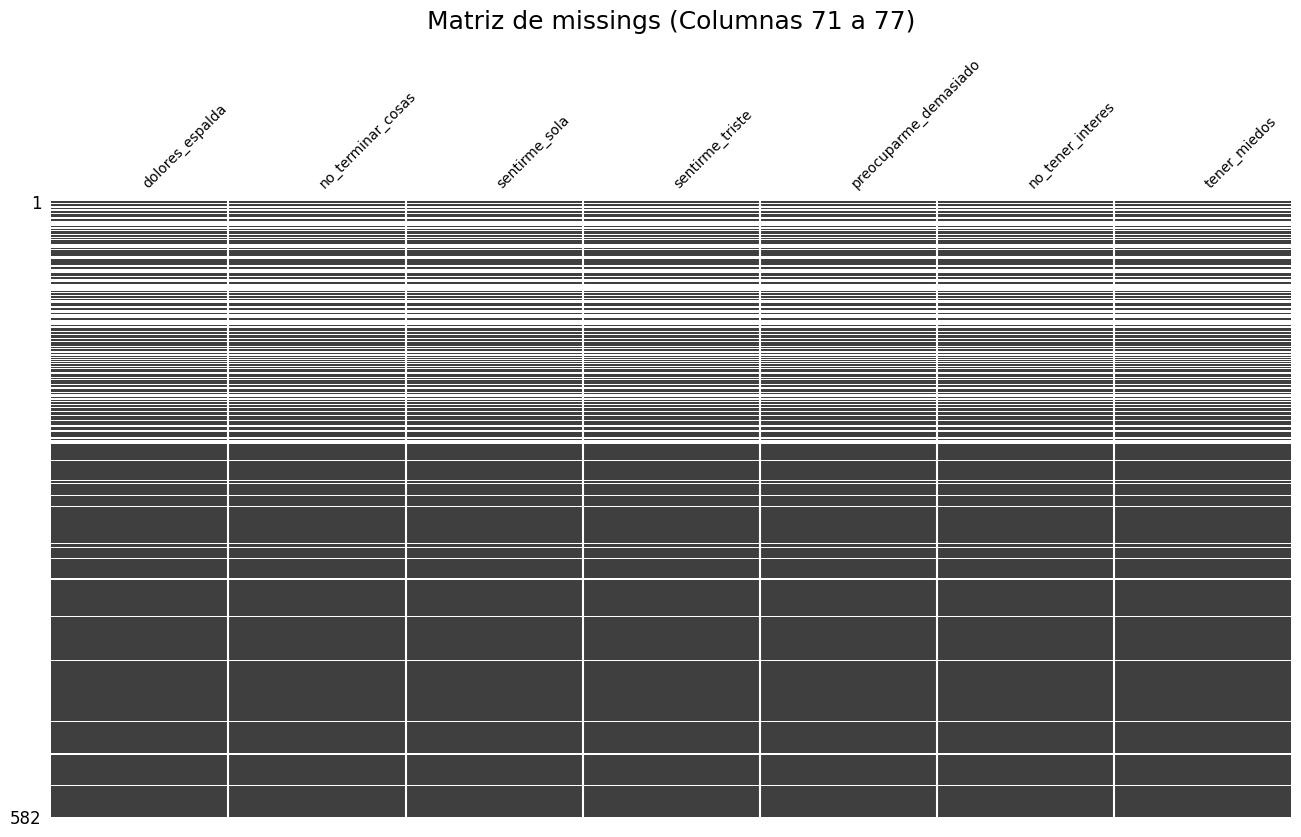

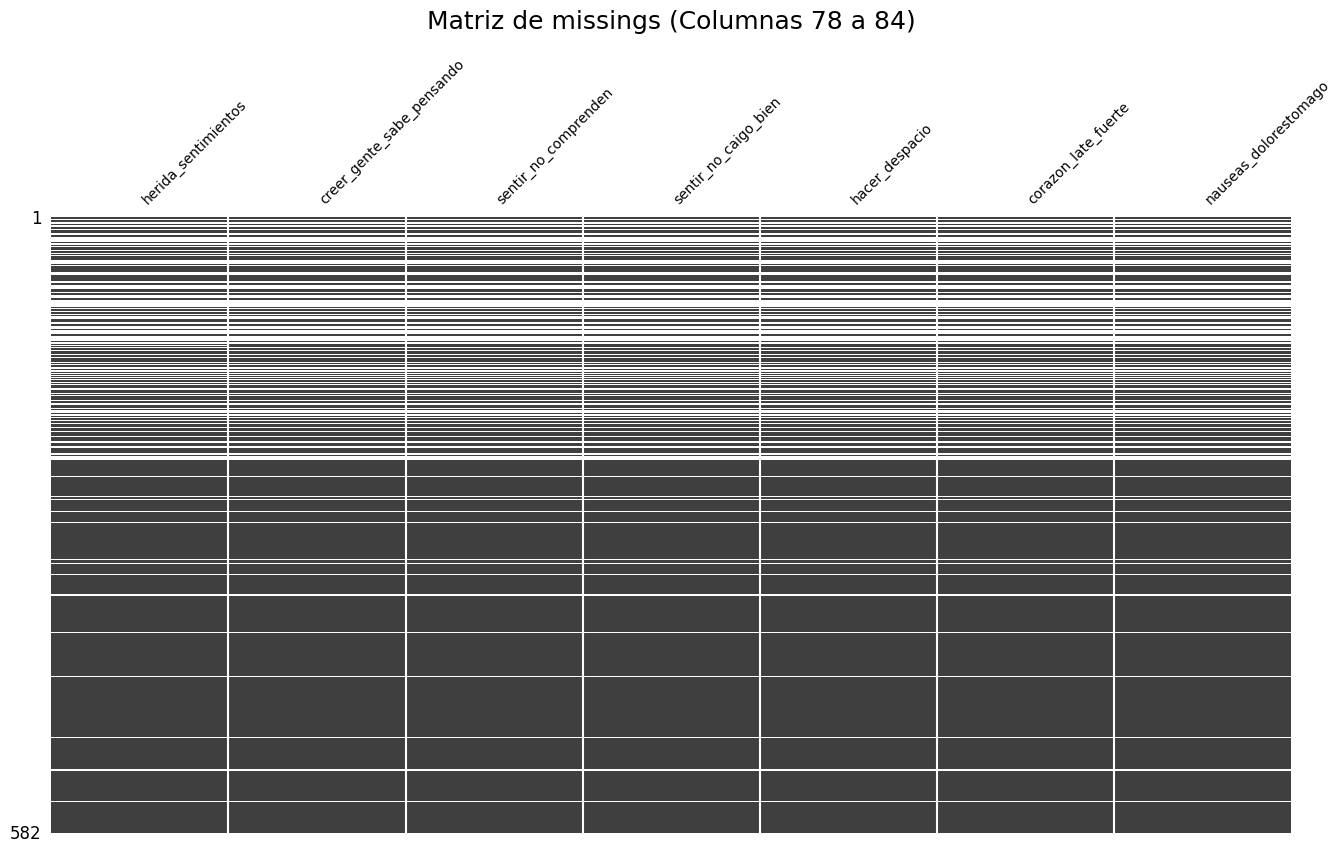

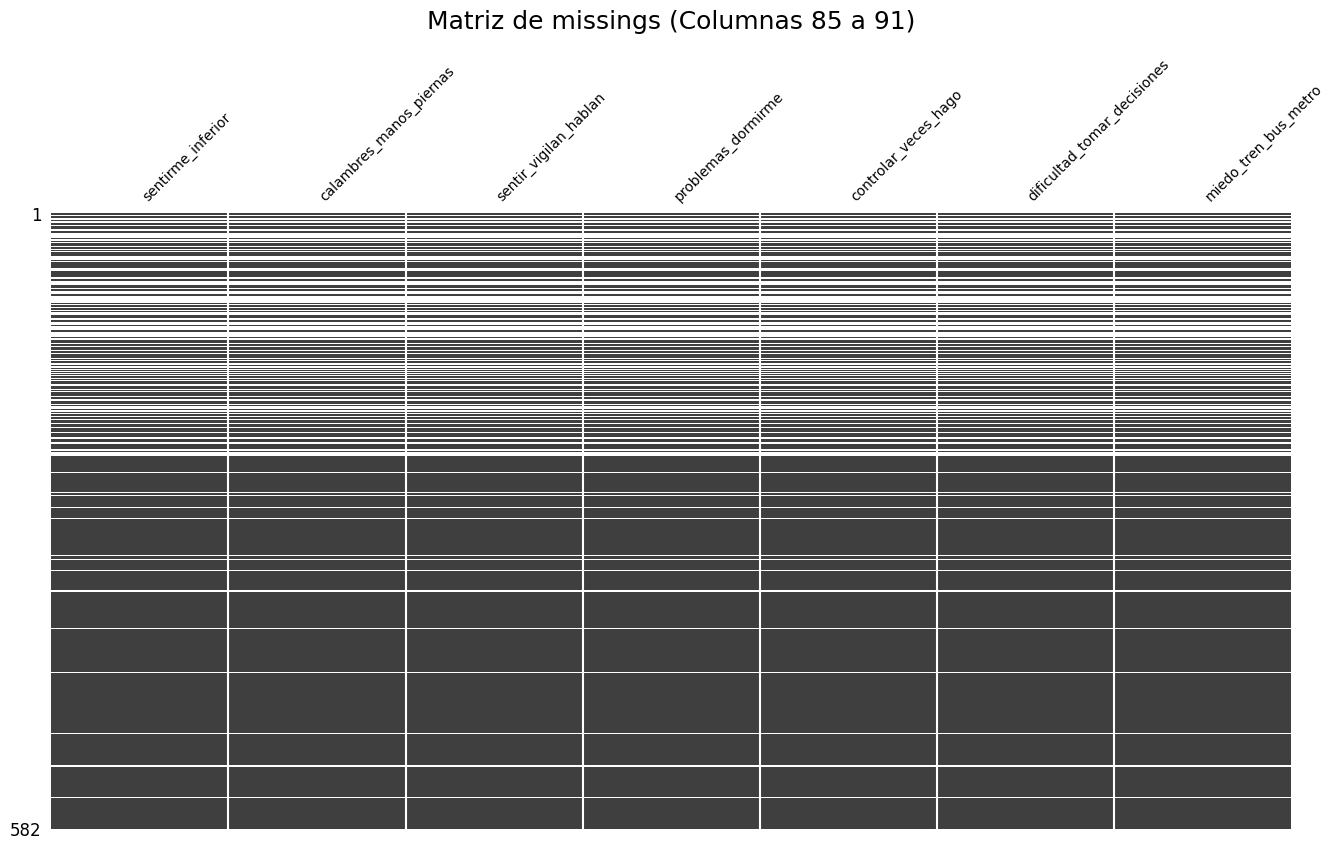

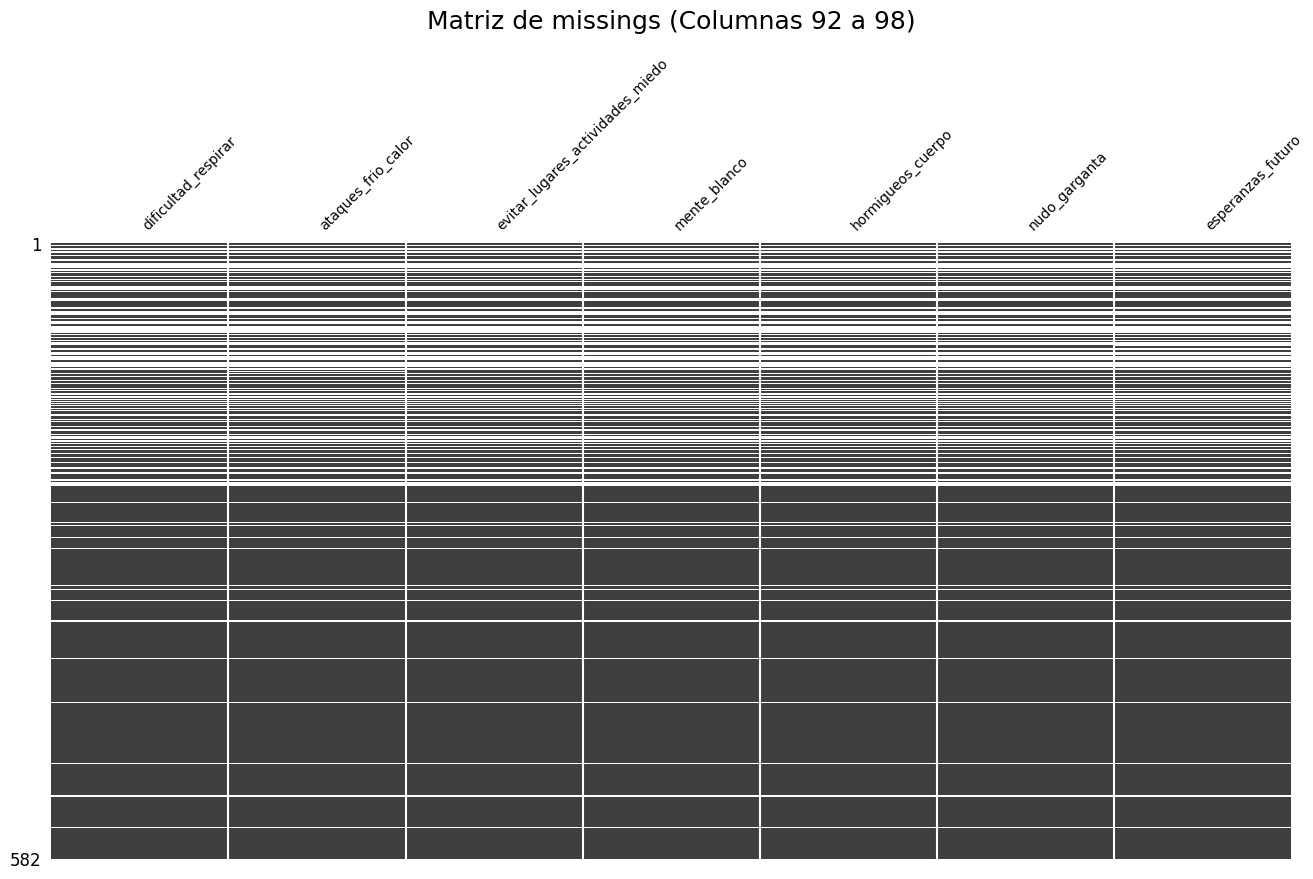

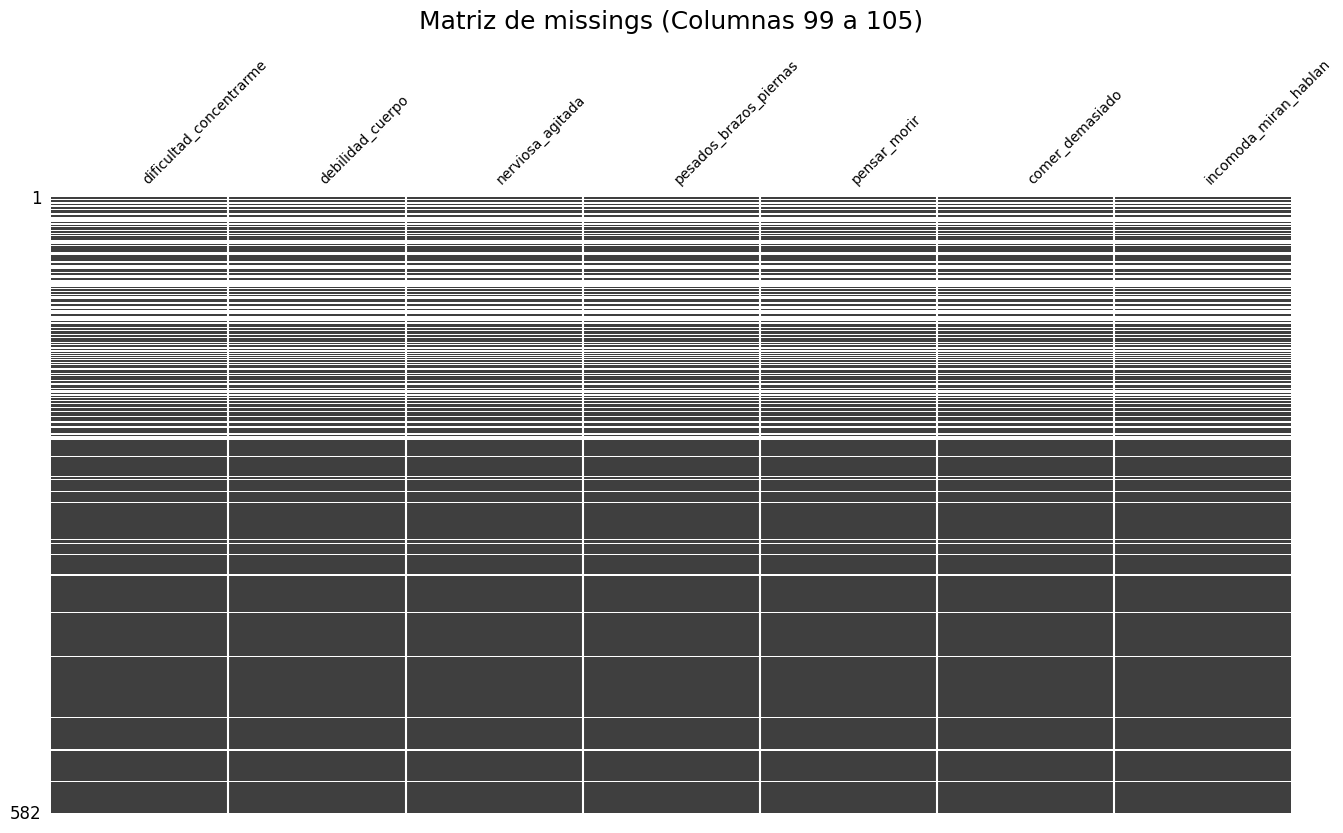

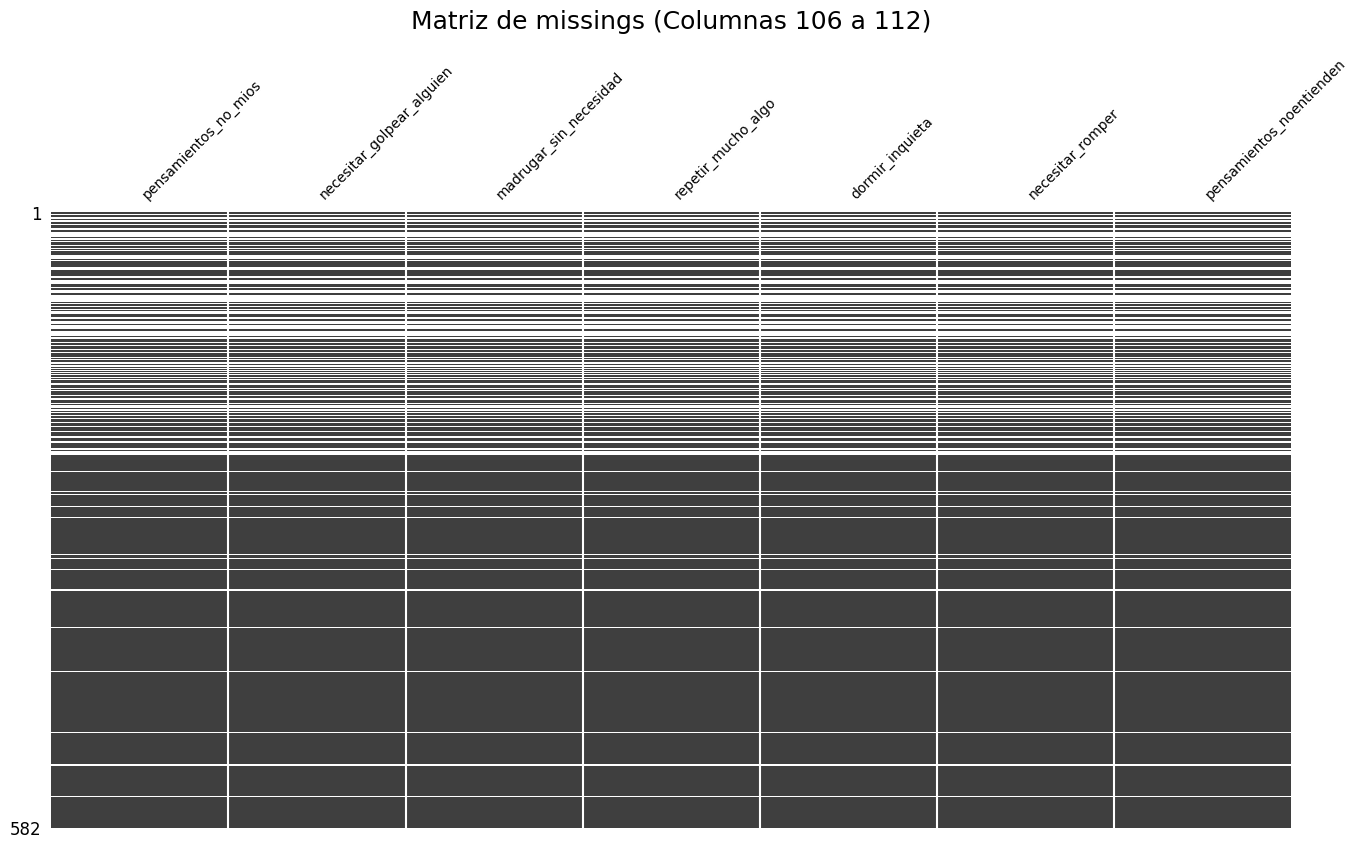

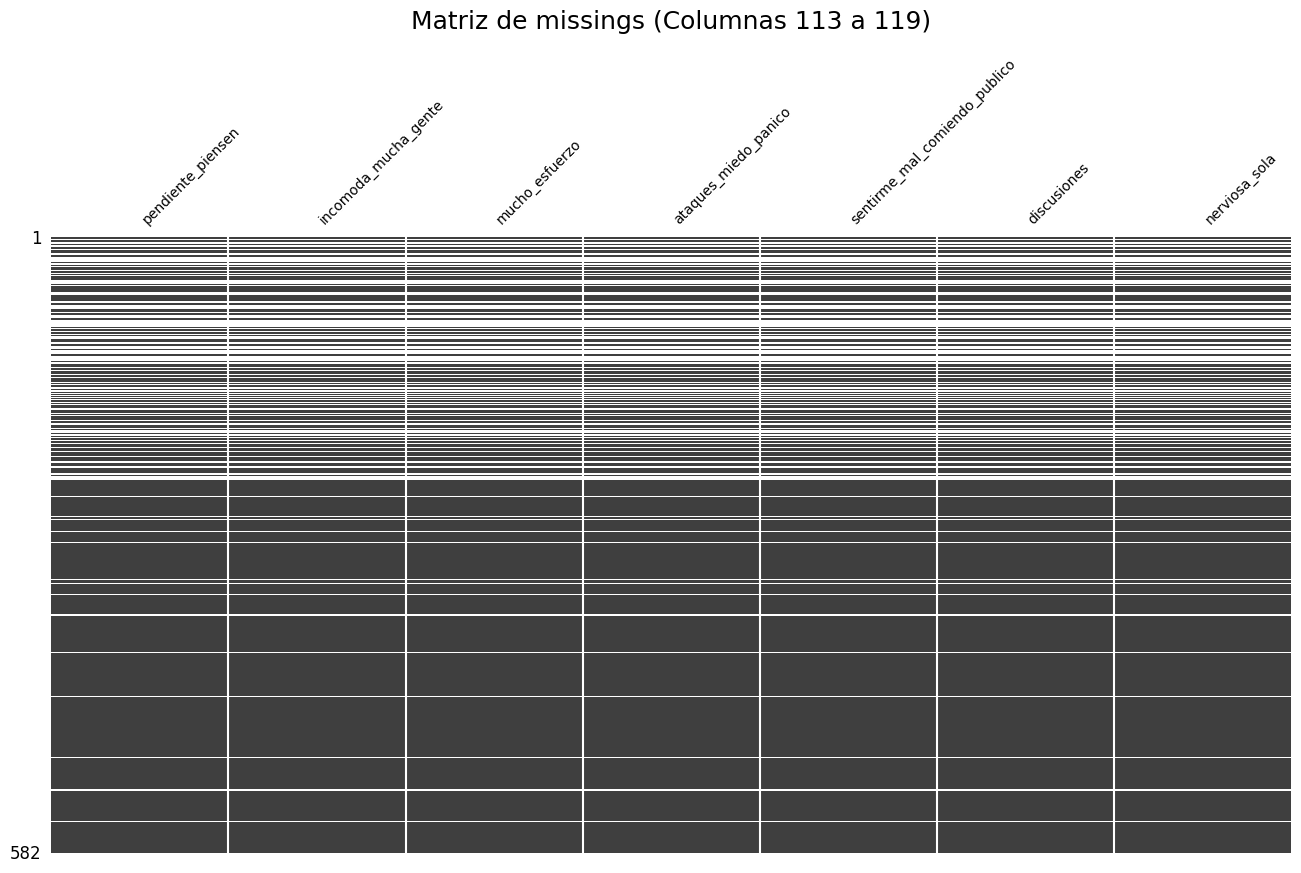

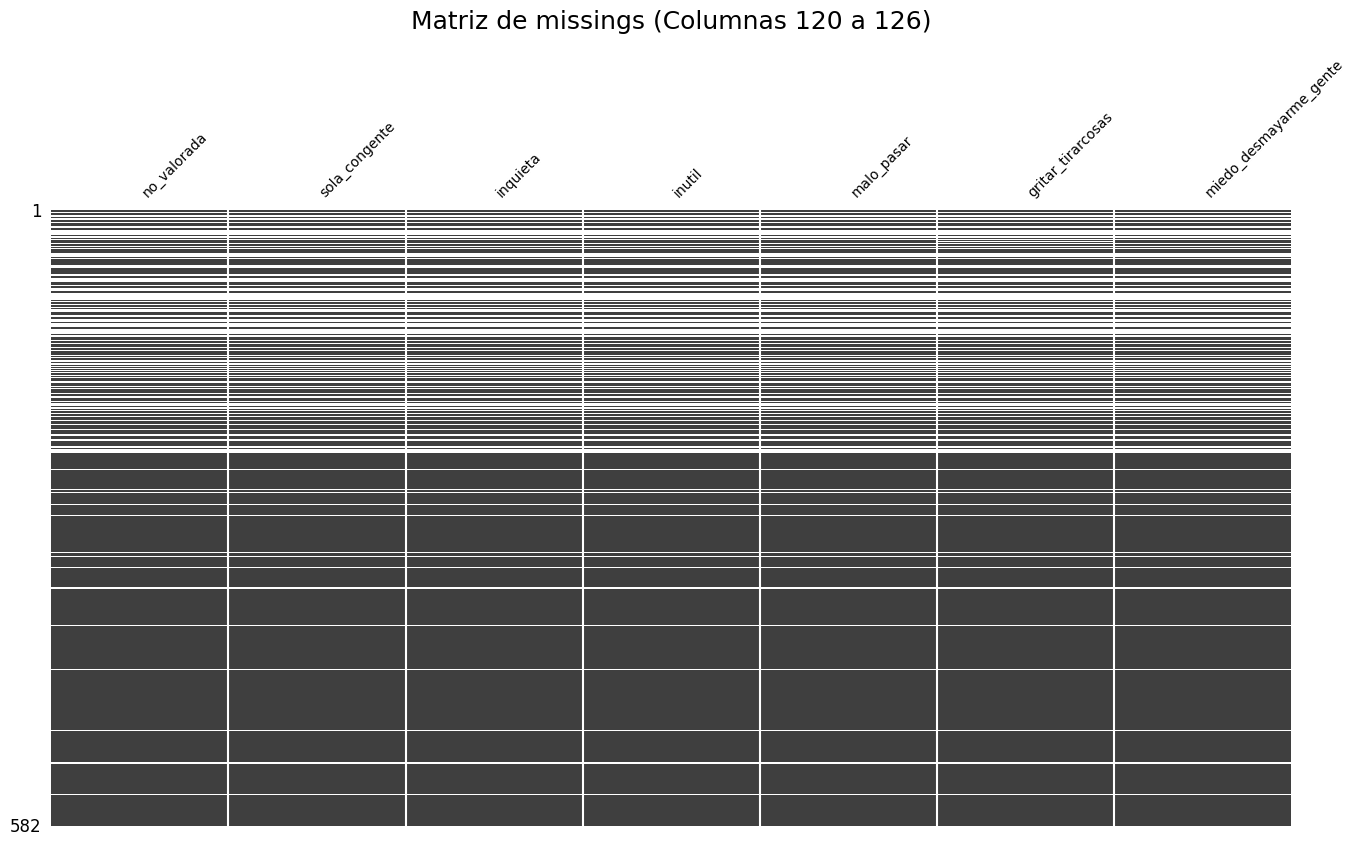

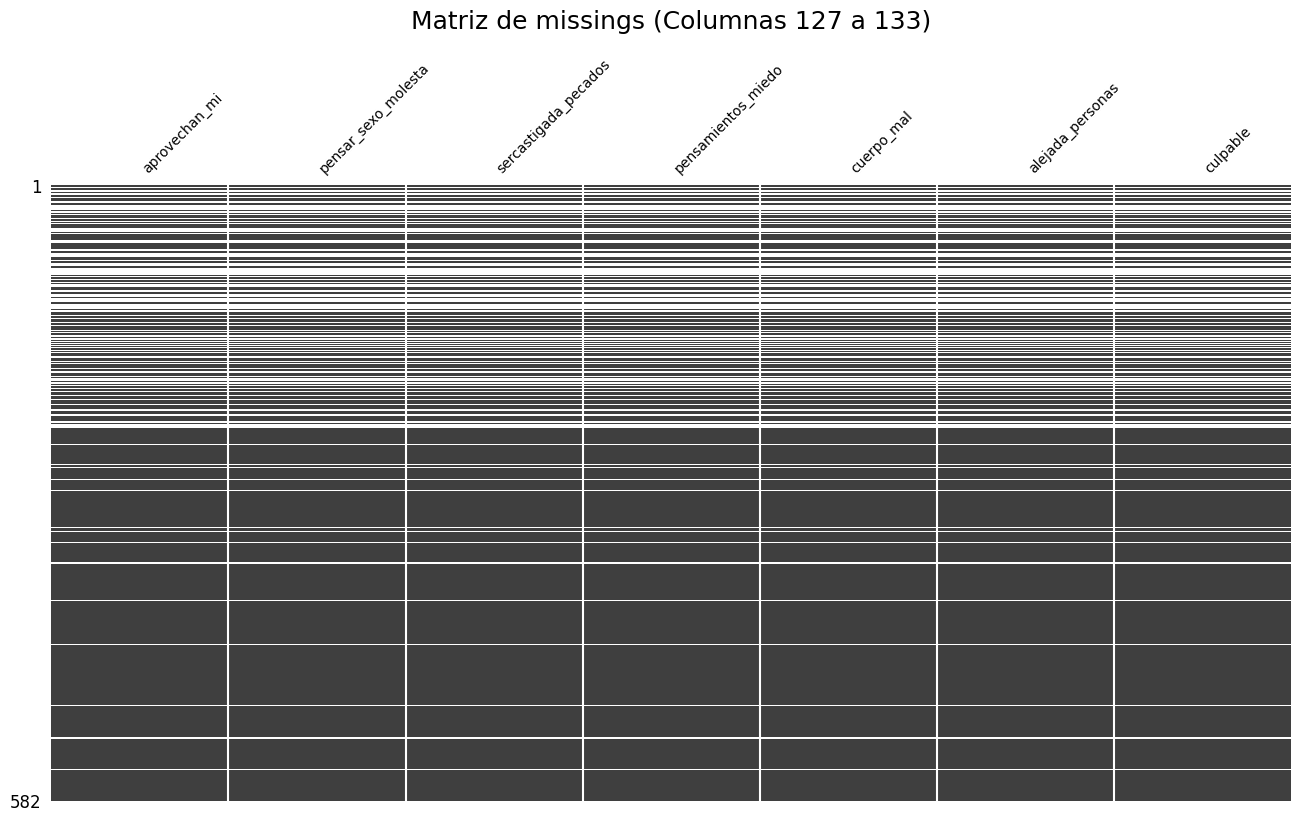

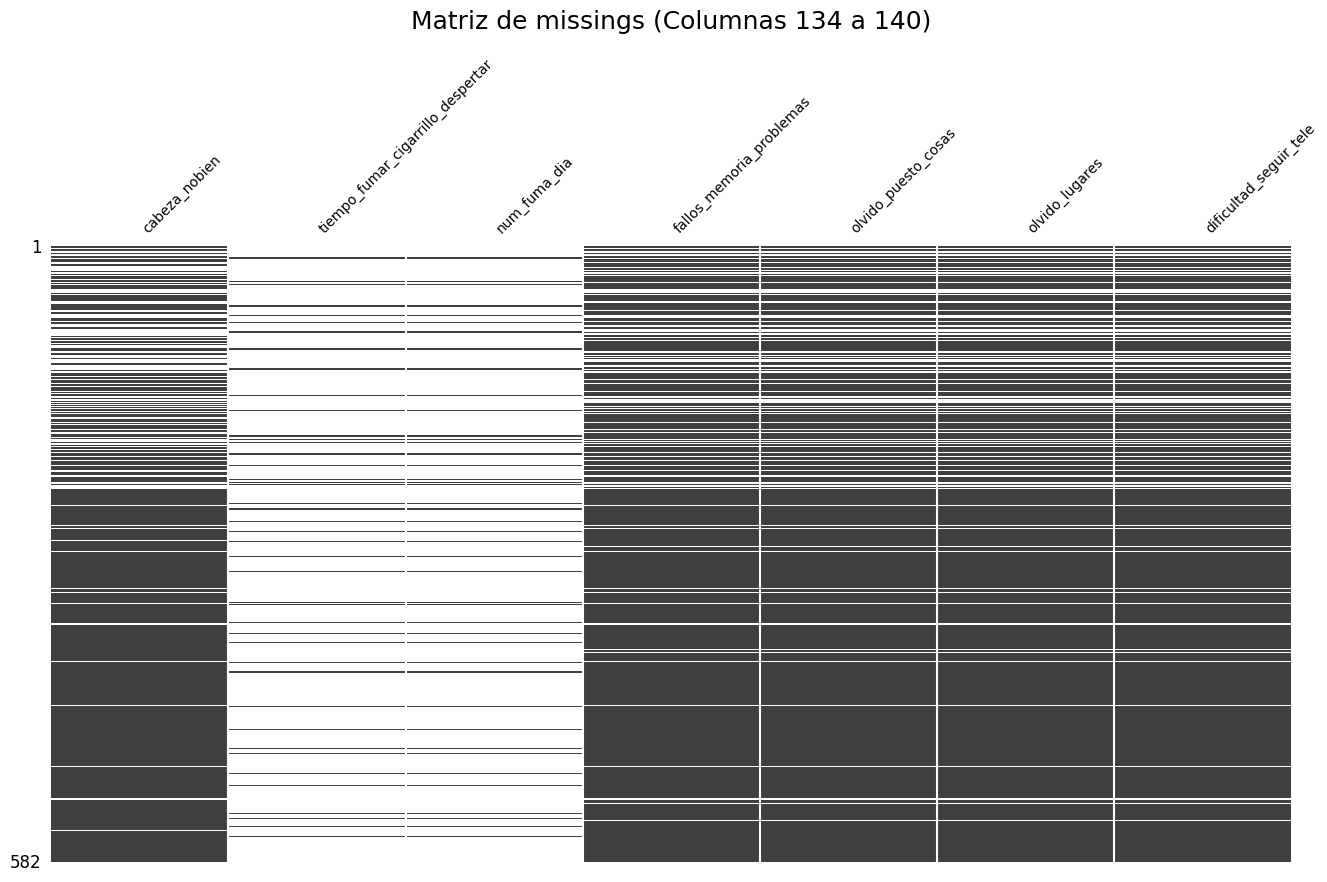

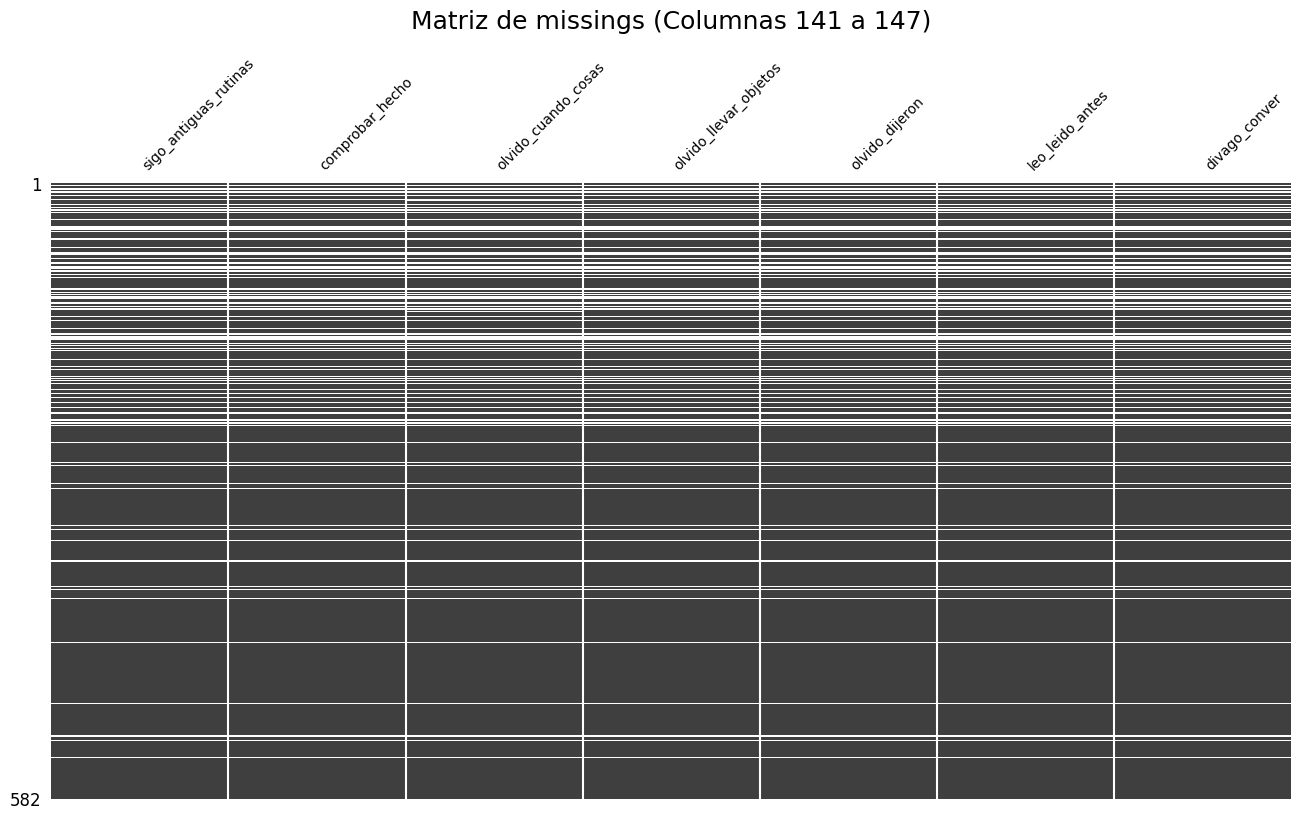

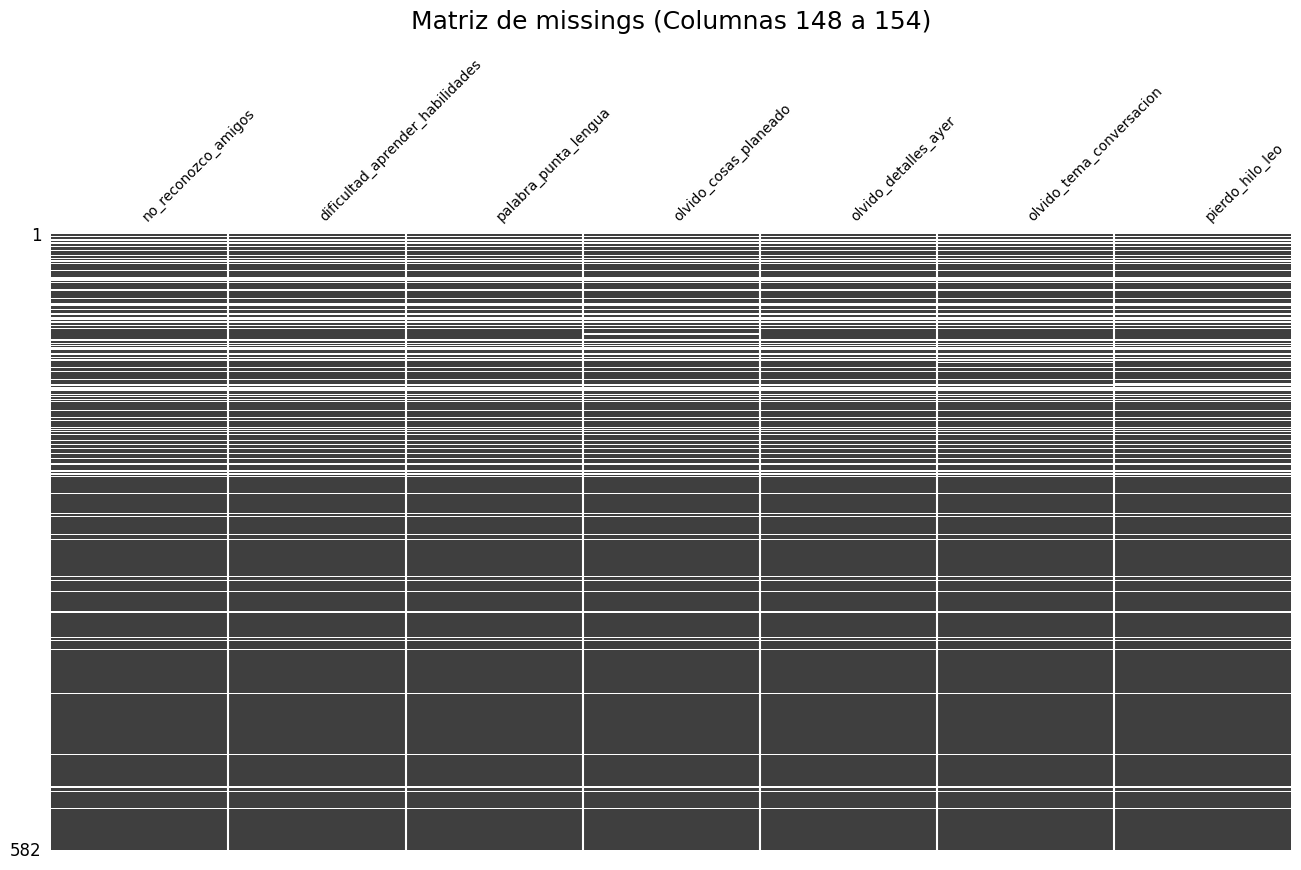

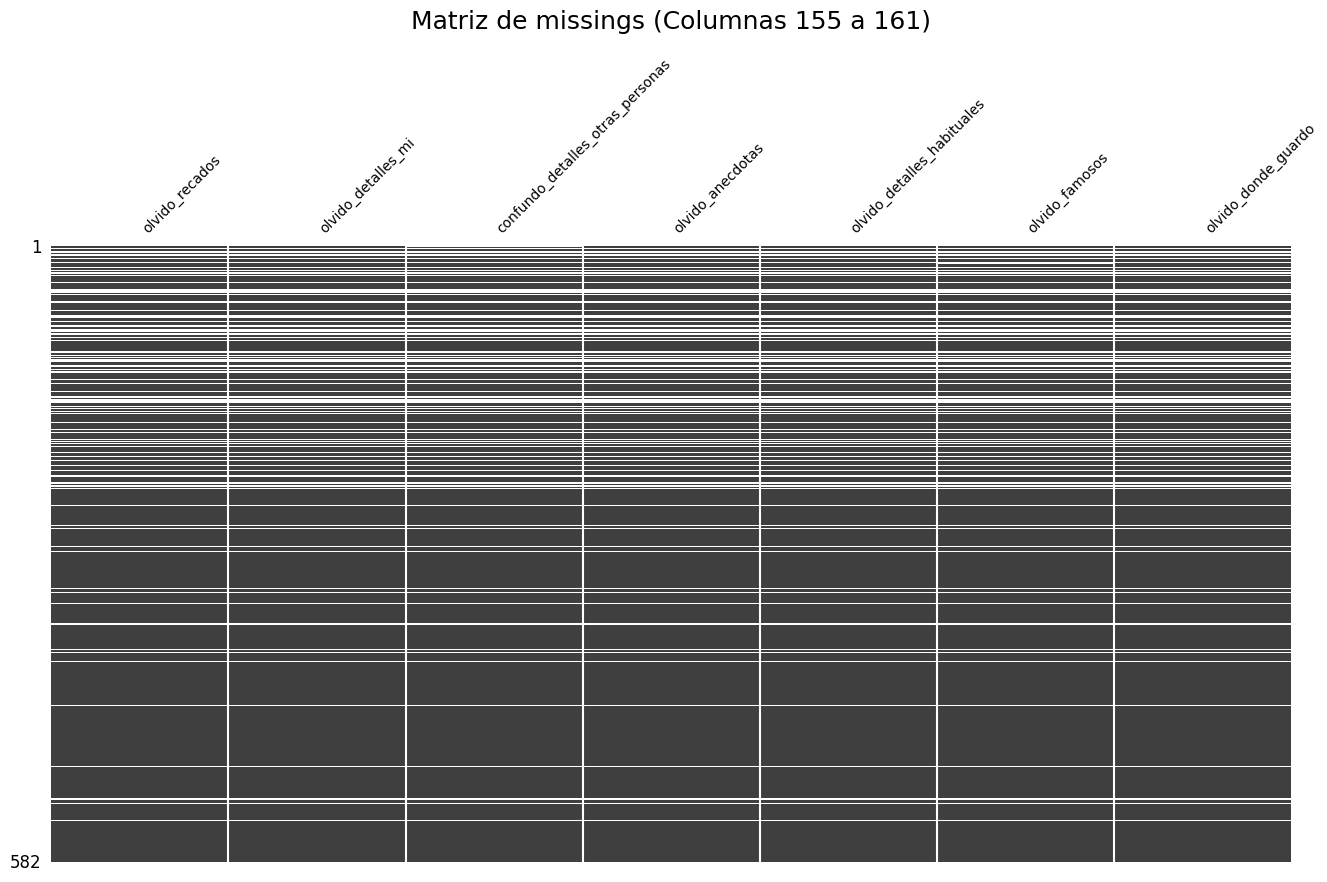

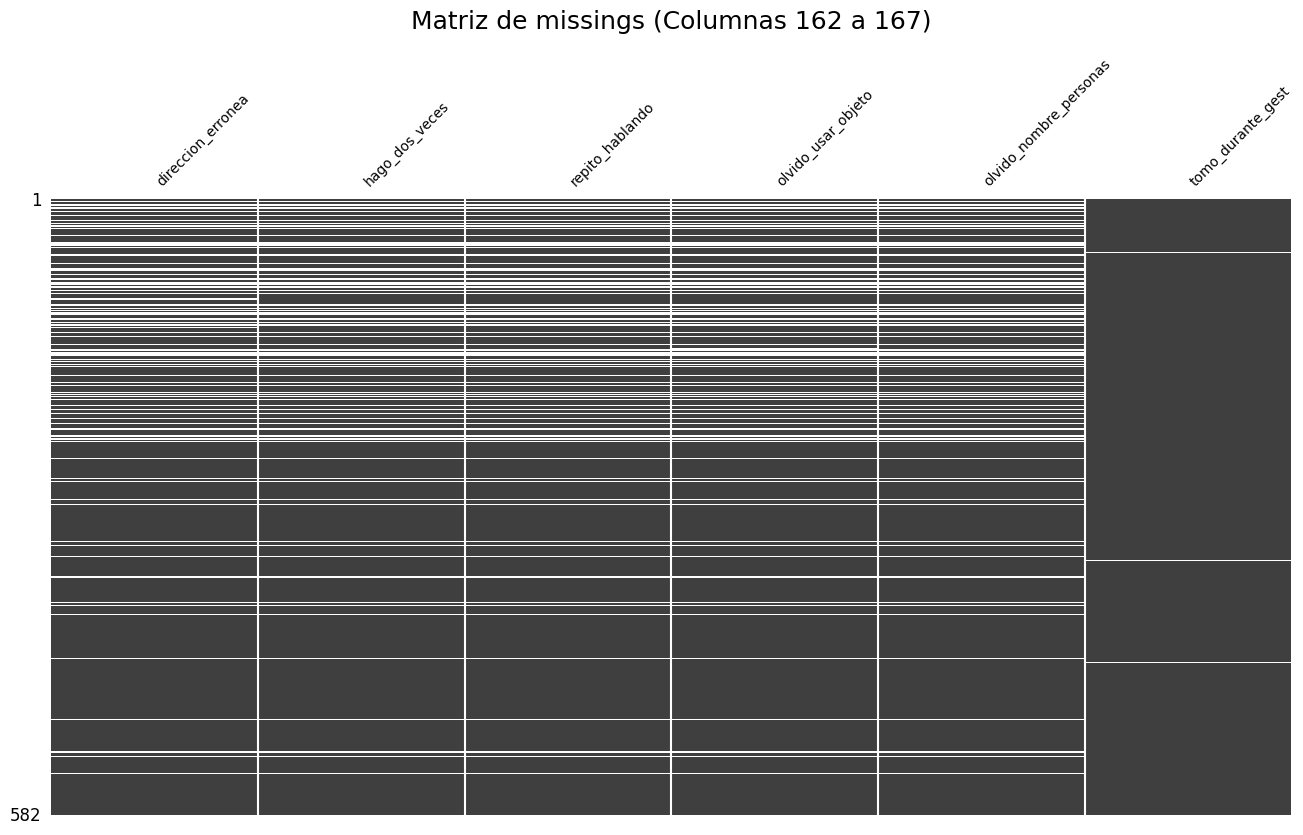

In [95]:
columnas_cat = df_missing_cat.columns.tolist()
bloque_size = 7 

# Bucle para mostrar la matriz por bloques
for i in range(0, len(columnas_cat), bloque_size):
    cols_chunk = columnas_cat[i : i + bloque_size]
    
    # Visualizamos la matriz para este bloque de categóricas
    msno.matrix(df_missing_cat[cols_chunk], figsize=(16, 8), fontsize=10, sparkline=False)
    
    plt.title(f"Matriz de missings (Columnas {i+1} a {min(i+bloque_size, len(columnas_cat))})", 
              fontsize=18, pad=20)
    plt.show()

### Matriz de missings (de df_cleaned2, que es el dataframe al que se le eliminan las filas y las columnas de >35% de missings)

#### Variables numéricas

In [96]:
# Seleccionamos solo las variables numéricas para el análisis de missings
df_mis_num = df_cleaned2.select_dtypes(include=['float64', 'int64'])
df_mis_num.shape

(582, 349)

In [ ]:
# ESTO ESTÁ COMENTADO PORQUE ES APLICADO AL DATAFRAME df_cleaned2, EN EL QUE SE HAN ELIMINADO TAMBIÉN LAS COLUMNAS CON MÁS DE 35% DE MISSINGS.
# SOLO ESTÁ HECHO POR SI ACASO PUEDE SER ÚTIL EN EL FUTURO PORQUE TODAVÍA NO SABEMOS QUÉ VARIABLES SE ELIMINARÁN.
# RECORDATORIO: EN df_cleaned SE HAN ELIMINADO LAS FILAS CON MÁS DE 35% DE MISSINGS, PERO NINGUNA COLUMNA
"""# Definimos las columnas y el tamaño del bloque
columnas_2 = df_mis_num.columns.tolist()
tamano_2 = 25 

# Bucle para generar una matriz por cada grupo de columnas
for i in range(0, len(columnas_2), tamano_2):
    # Seleccionamos el subconjunto de columnas
    cols_chunk = columnas_2[i : i + tamano_2]
    
    # Creamos la matriz para este bloque
    # 'sparkline=False' para ocultar la línea de la derecha y ganar espacio
    msno.matrix(df_mis_num[cols_chunk], figsize=(16, 8), fontsize=10, sparkline = False)
    
    # Añadimos el título indicando qué variables estamos viendo
    plt.title(f"Matriz de missings (Variables {i+1} a {min(i+tamano_2, len(columnas_2))})", 
              fontsize=18, pad=20)
    
    plt.show()"""

'# Definimos las columnas y el tamaño del bloque\ncolumnas_2 = df_mis_num.columns.tolist()\ntamano_2 = 25 \n\n# Bucle para generar una matriz por cada grupo de columnas\nfor i in range(0, len(columnas_2), tamano_2):\n    # Seleccionamos el subconjunto de columnas\n    cols_chunk = columnas_2[i : i + tamano_2]\n\n    # Creamos la matriz para este bloque\n    # \'sparkline=False\' para ocultar la línea de la derecha y ganar espacio\n    msno.matrix(df_mis_num[cols_chunk], figsize=(16, 8), fontsize=10, sparkline = False)\n\n    # Añadimos el título indicando qué variables estamos viendo\n    plt.title(f"Matriz de missings (Variables {i+1} a {min(i+tamano_2, len(columnas_2))})", \n              fontsize=18, pad=20)\n\n    plt.show()'

#### Variables categóricas

In [97]:
# Seleccionamos solo las variables categóricas para el análisis de missings
df_mis_cat = df_cleaned2.select_dtypes(include=['object', 'category'])
df_mis_cat.shape

(582, 159)

In [ ]:
# IDEM. ESTO ES CON df_cleaned2
"""columnas_cat_2 = df_mis_cat.columns.tolist()
bloq_size = 4 

# Bucle para mostrar la matriz por bloques
for i in range(0, len(columnas_cat_2), bloq_size):
    cols_chunk = columnas_cat_2[i : i + bloq_size]
    
    # Visualizamos la matriz para este bloque de categóricas
    msno.matrix(df_mis_cat[cols_chunk], figsize=(16, 8), fontsize=10, sparkline=False)
    
    plt.title(f"Matriz de missings (Columnas {i+1} a {min(i+bloq_size, len(columnas_cat_2))})", 
              fontsize=18, pad=20)
    plt.show()"""

'columnas_cat_2 = df_mis_cat.columns.tolist()\nbloq_size = 4 \n\n# Bucle para mostrar la matriz por bloques\nfor i in range(0, len(columnas_cat_2), bloq_size):\n    cols_chunk = columnas_cat_2[i : i + bloq_size]\n\n    # Visualizamos la matriz para este bloque de categóricas\n    msno.matrix(df_mis_cat[cols_chunk], figsize=(16, 8), fontsize=10, sparkline=False)\n\n    plt.title(f"Matriz de missings (Columnas {i+1} a {min(i+bloq_size, len(columnas_cat_2))})", \n              fontsize=18, pad=20)\n    plt.show()'

# ANÁLISIS DE DISTRIBUCIONES

El objetivo es ver si hay variables que presentan sesgos (colas) muy largas hacia algún lado, si hay desbalanceo de clases y si hay variables constantes

In [103]:
# Seleccionamos las variables categóricas de df_cleaned
cols_categoricas = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Total de variables categóricas en df_cleaned: {len(cols_categoricas)}")
print(f"\nVariables categóricas:\n{cols_categoricas}")

Total de variables categóricas en df_cleaned: 167

Variables categóricas:
['nivel_estudios', 'tipo_pe_pre', 'riesgo_pe_1tri', 'especificar_otras_induccion', 'especificar_otras_cesarea', 'apgar_1min', 'apgar_5min', 'apgar_10min', 'comentaris', 'estenosis_mitral', 'calidad_del_examen', 'otros_comentarios', 'pan', 'verdura_ensalada', 'fruta', 'yogur_leche', 'pasta_arroz', 'aceite_oliva_girasol', 'bebida_alcoholica', 'vasos_agua_dia', 'carne', 'embutidos', 'queso_nbsp', 'bolleria_pasteleria', 'mantequilla', 'bebida_azucarada', 'comida_rapida', 'pescado', 'legumbres', 'frutos_secos', 'frec_afectado_inesperadamente', 'frec_incapaz_controlar_cosas_importantes', 'frec_nervioso_estresado', 'frec_manejado_pequenos_problemas_irritantes', 'frec_afrontado_cambios_importantes', 'frec_seguro_capacidad_manejar_problemas_personales', 'frec_cosas_van_bien', 'frec_no_afrontar_todas_cosas', 'frec_controlar_dificultades', 'frec_todo_bajo_control', 'frec_enfadado_cosas_fuera_control', 'frec_pensado_cosas_po

In [104]:
# Creamos una función para analizar distribución de variables categóricas
def analizar_distribucion_categorica(df, columna):
   # Contamos valores (incluyendo NaN)
    freq_abs = df[columna].value_counts(dropna=False)
    freq_rel = df[columna].value_counts(dropna=False, normalize=True)
    
    # Creamos DataFrame con el análisis
    analisis = pd.DataFrame({
        'Frecuencia_Absoluta': freq_abs,
        'Frecuencia_Relativa': freq_rel,
        'Porcentaje': freq_rel * 100
    })
    
    # Redondeamos los decimales
    analisis['Frecuencia_Relativa'] = analisis['Frecuencia_Relativa'].round(4)
    analisis['Porcentaje'] = analisis['Porcentaje'].round(2)
    
    return analisis

In [106]:
# Hacemos el análisis de todas las variables categóricas
print("ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CATEGÓRICAS")

for col in cols_categoricas:
    print(f"\nVariable: {col}")
    
    # Obtenemos el análisis
    dist = analizar_distribucion_categorica(df_cleaned, col)
    
    # Mostramos la tabla
    print(dist)
    
    # Información adicional
    n_categorias = df_cleaned[col].nunique(dropna=False)
    n_missing = df_cleaned[col].isna().sum()
    pct_missing = (n_missing / len(df_cleaned)) * 100
    
    print(f"\nNúmero de categorías únicas: {n_categorias}")
    print(f"Valores missing: {n_missing} ({pct_missing:.2f}%)")

ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CATEGÓRICAS

Variable: nivel_estudios
                Frecuencia_Absoluta  Frecuencia_Relativa  Porcentaje
nivel_estudios                                                      
3.0                             393               0.6753       67.53
2.0                             166               0.2852       28.52
NaN                              12               0.0206        2.06
1.0                              10               0.0172        1.72
0.0                               1               0.0017        0.17

Número de categorías únicas: 5
Valores missing: 12 (2.06%)

Variable: tipo_pe_pre
             Frecuencia_Absoluta  Frecuencia_Relativa  Porcentaje
tipo_pe_pre                                                      
NaN                          545               0.9364       93.64
0.0                           20               0.0344        3.44
1.0                           17               0.0292        2.92

Número de categorías únic

In [107]:
# Visualización de todas las variables categóricas
n_cols = 3  # Número de columnas en la cuadrícula
n_vars = len(cols_categoricas)
n_rows = math.ceil(n_vars / n_cols)

# Crear la figura
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Aplanar los ejes
if n_vars == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Bucle para crear gráficos
for i, col in enumerate(cols_categoricas):
    # Contamos valores (sin NaN para el gráfico)
    value_counts = df_cleaned[col].value_counts()
    
    # Si hay muchas categorías, tomamos solo las top 15
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        titulo = f'{col}\n(Top 15 categorías)'
    else:
        titulo = col
    
    # Crear gráfico de barras
    if not value_counts.empty:
        value_counts.plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
        axes[i].set_title(titulo, fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].grid(axis='y', alpha=0.3)
        
        # Añadir valores en las barras
        for container in axes[i].containers:
            axes[i].bar_label(container, fontsize=8)
    else:
        axes[i].text(0.5, 0.5, f'{col}\n(Sin datos)', 
                     ha='center', va='center', transform=axes[i].transAxes)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [113]:
# Hacemos un resumen general de todas las variables categóricas
resumen_categoricas = []

for col in cols_categoricas:
    n_total = len(df_cleaned)
    n_unicos = df_cleaned[col].nunique(dropna=False)
    n_missing = df_cleaned[col].isna().sum()
    pct_missing = (n_missing / n_total) * 100
    
    # Categoría más frecuente
    if df_cleaned[col].notna().sum() > 0:
        moda = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else 'N/A'
        freq_moda = df_cleaned[col].value_counts().iloc[0] if not df_cleaned[col].value_counts().empty else 0
        pct_moda = (freq_moda / n_total) * 100
    else:
        moda = 'N/A'
        freq_moda = 0
        pct_moda = 0
    
    resumen_categoricas.append({
        'Variable': col,
        'Num_categorias': n_unicos,
        'Missings': n_missing,
        'Pct_missing': round(pct_missing, 2),
        'Moda': moda,
        'Freq_moda': freq_moda,
        'Pct_moda': round(pct_moda, 2)
    })

# Crear DataFrame resumen
df_resumen_cat = pd.DataFrame(resumen_categoricas)

print("RESUMEN DISTRIBUCIONES")
print(df_resumen_cat.to_string(index=False))

RESUMEN DISTRIBUCIONES
                                          Variable  Num_categorias  Missings  Pct_missing                     Moda  Freq_moda  Pct_moda
                                    nivel_estudios               5        12         2.06                      3.0        393     67.53
                                       tipo_pe_pre               3       545        93.64                      0.0         20      3.44
                                    riesgo_pe_1tri               4        26         4.47                      0.0        303     52.06
                       especificar_otras_induccion              18       534        91.75 Hipertensión gestacional         13      2.23
                         especificar_otras_cesarea               7       571        98.11    Empeoramiento materno          4      0.69
                                        apgar_1min              11         6         1.03                      9.0        462     79.38
                         

# ANÁLISIS DE OUTLIERS

Lo hacemos de df_cleaned (que es el dataframe sin las filas con más de 35% missings) y de df_cleaned2 (que es el dataframe al que se le han quitado las filas y las columnas con más de 35% de missings)

### Outliers (de df_cleaned)

#### Variables numéricas

In [98]:
def analizar_outliers(df):
    resultados = []

    for col in df.columns:
        # Ignorar columnas con puros valores nulos para evitar errores
        if df[col].isnull().all():
            continue
            
        total_datos = len(df[col].dropna())
        
        # Tratamiento para variables numéricas (con IQR)
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            
            # Contar valores fuera de los límites
            n_outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()

        # Calcular porcentaje
        porcentaje = (n_outliers / len(df)) * 100
        
        resultados.append({
            'Variable': col,
            'Cantidad outliers': n_outliers,
            'Porcentaje (%)': round(porcentaje, 2)
        })

    # Crear DataFrame de resultados y ordenar por mayor porcentaje de outliers
    df_outliers = pd.DataFrame(resultados).sort_values(by='Porcentaje (%)', ascending=False)
    return df_outliers


In [99]:
reporte_outliers = analizar_outliers(df_cleaned)

# Visualizamos el top 20 de variables con más outliers
print(reporte_outliers.head(20))

                       Variable  Cantidad outliers  Porcentaje (%)
350  valvula_aortica_Tricuspide                139           23.88
430                        pe_1                137           23.54
342  tipo_cesarea_Intercurrente                137           23.54
429                        pe_0                137           23.54
386            aborto_menor20_1                128           21.99
416     deter_sflt1_plgf_gest_1                128           21.99
385            aborto_menor20_0                128           21.99
380          patron_menstrual_1                127           21.82
413                 plgf_1tri_0                125           21.48
323                etnia_Latina                121           20.79
536               pelo_tenido_1                121           20.79
550     uterinas_p95_eco_2tri_0                121           20.79
527   cardiopatia_estructural_0                113           19.42
415     deter_sflt1_plgf_gest_0                112           1

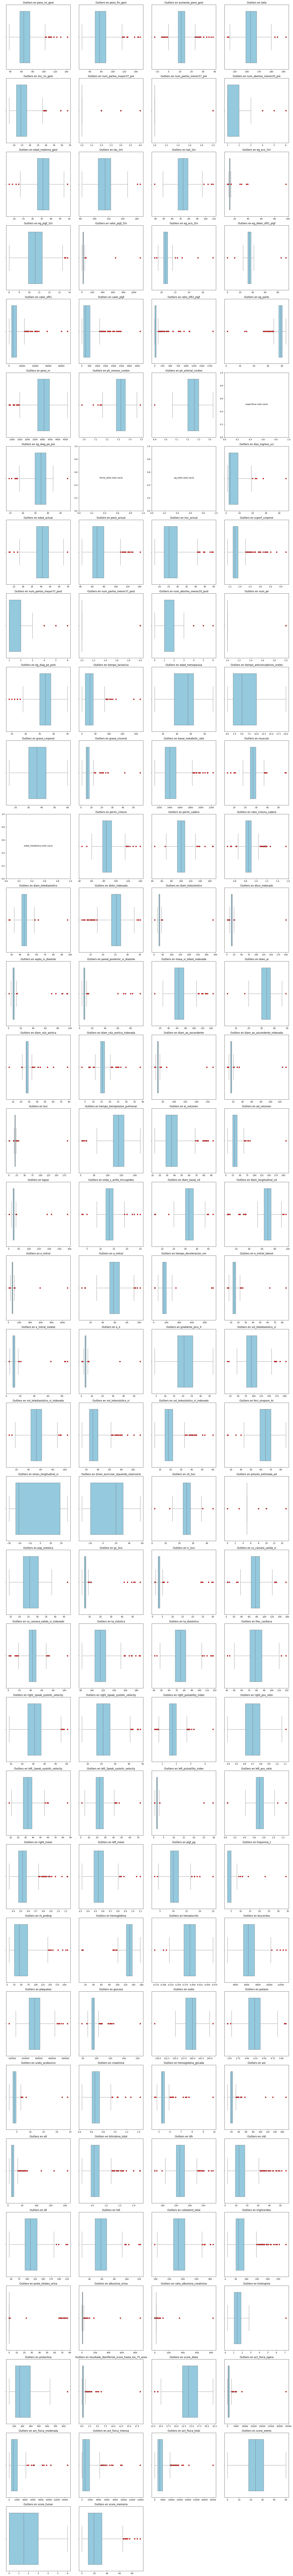

In [100]:
cols_numericas = df_cleaned.select_dtypes('float', 'int')

n_colum = 4
n_vars = len(cols_numericas)
n_rows = math.ceil(n_vars / n_colum)

# Creamos la figura
fig, axes = plt.subplots(nrows=n_rows, ncols=n_colum, figsize=(20, 5 * n_rows))
axes = axes.flatten() # Convertimos la matriz en lista simple

# Bucle de graficado
for i, col in enumerate(cols_numericas):
    # ELIMINAR NaN: Esto suele prevenir el ValueError de 'positions'
    data_clean = df[col].dropna()
    
    if not data_clean.empty:
        sns.boxplot(
            x=data_clean, 
            ax=axes[i], 
            color='skyblue', 
            flierprops={'markerfacecolor':'red', 'marker':'o'}
        )
        axes[i].set_title(f'Outliers en {col}', fontsize=12)
    else:
        axes[i].text(0.5, 0.5, f'{col} está vacía', ha='center')
    
    axes[i].set_xlabel('')

# Limpiamos los subplots que sobren (si n_vars no es múltiplo de 4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outliers (de df_cleaned_2)

In [102]:
# LO COMENTAMOS PORQUE ES EL ANÁLISIS DE OUTLIERS EN df_cleaned2, QUE ES EL DATAFRAME EN EL QUE SE HAN ELIMINADO LAS COLUMNAS CON MÁS DE 35% DE MISSINGS, PERO TODAVÍA NO SABEMOS QUÉ VARIABLES SE ELIMINARÁN, ASÍ QUE LO DEJAMOS POR SI PUEDE SER ÚTIL EN EL FUTURO.
"""# Identificamos y analizar los outliers en df_cleaned_2
reporte_outliers_2 = analizar_outliers(df_cleaned2)

print("Reporte de outliers (df_cleaned2)\n")
print(reporte_outliers_2.head(20)) # Mostramos las 20 variables con más outliers

# Seleccionamos solo las columnas numéricas para los boxplots
cols_numericas_2 = df_cleaned2.select_dtypes(include=['number']).columns.tolist()

# Configuración de la cuadrícula (4 gráficos por fila)
n_cols_deseado = 4
n_vars = len(cols_numericas_2)

if n_vars == 0:
    print("No hay variables numéricas en df_cleaned2 para graficar.")
else:
    n_rows = math.ceil(n_vars / n_cols_deseado)

    # Crear la figura
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_deseado, figsize=(20, 5 * n_rows))

    # Aplanar los ejes para poder iterar fácilmente (manejando caso de 1 solo gráfico)
    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Bucle para generar los Boxplots
    for i, col in enumerate(cols_numericas_2):
        # Limpieza de nulos por columna para asegurar que el boxplot no falle
        data_clean = df_cleaned2[col].dropna()
        
        if not data_clean.empty:
            sns.boxplot(
                x=data_clean, 
                ax=axes[i], 
                color='lightgreen', # Usamos verde para diferenciar de la visualización anterior
                flierprops={'markerfacecolor':'red', 'marker':'o', 'markersize': 5}
            )
            axes[i].set_title(f'Outliers en {col}', fontsize=12, fontweight='bold')
        else:
            # Texto informativo si la columna terminó vacía tras el dropna
            axes[i].text(0.5, 0.5, f'{col}\n(Sin datos numéricos)', 
                         ha='center', va='center', transform=axes[i].transAxes)
        
        axes[i].set_xlabel('')

    # Eliminar los subplots que queden vacíos al final de la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()"""

'# Identificamos y analizar los outliers en df_cleaned_2\nreporte_outliers_2 = analizar_outliers(df_cleaned2)\n\nprint("Reporte de outliers (df_cleaned2)\n")\nprint(reporte_outliers_2.head(20)) # Mostramos las 20 variables con más outliers\n\n# Seleccionamos solo las columnas numéricas para los boxplots\ncols_numericas_2 = df_cleaned2.select_dtypes(include=[\'number\']).columns.tolist()\n\n# Configuración de la cuadrícula (4 gráficos por fila)\nn_cols_deseado = 4\nn_vars = len(cols_numericas_2)\n\nif n_vars == 0:\n    print("No hay variables numéricas en df_cleaned2 para graficar.")\nelse:\n    n_rows = math.ceil(n_vars / n_cols_deseado)\n\n    # Crear la figura\n    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_deseado, figsize=(20, 5 * n_rows))\n\n    # Aplanar los ejes para poder iterar fácilmente (manejando caso de 1 solo gráfico)\n    if n_vars == 1:\n        axes = [axes]\n    else:\n        axes = axes.flatten()\n\n    # Bucle para generar los Boxplots\n    for i, col in e